In [1]:
def fizz_buzz_encode(i):
    if i % 15 == 0 :return 3 
    elif i % 5 == 0 :return 2 
    elif i % 3 == 0 :return 1
    else: return 0 
def fizz_buzz_decode(i,prediction):
    return (str(i),"fizz","buzz",'fizz_buzz')[prediction]
def helper(i):
    return fizz_buzz_decode(i,fizz_buzz_encode(i))
for i in range(1,20):
    print(helper(i))

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizz_buzz
16
17
fizz
19


In [2]:
import numpy as np 
import torch
NUM_DIGITS = 10
def binary_encode(i,num_digits):
    return np.array([i >> d &1 for d in range(num_digits)])
binary_encode(10,NUM_DIGITS) 
trX = torch.Tensor([binary_encode(i,NUM_DIGITS)for i in range(101,2 ** NUM_DIGITS)])
trY = torch.LongTensor([fizz_buzz_encode(i) for i in range(101,2 ** NUM_DIGITS)])

In [3]:
NUM_HIDDEN = 100
model = torch.nn.Sequential(torch.nn.Linear(NUM_DIGITS,NUM_HIDDEN),
                            torch.nn.ReLU(),
                            torch.nn.Linear(NUM_HIDDEN,4))
if torch.cuda.is_available():
    model = model.cuda()

In [5]:
loss_fn = torch.nn.CrossEntropyLoss() #界定损失
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [6]:
batch_size=128
for epoch in range(3000):
    for start in range(0,len(trX),batch_size):
        end = start + batch_size
        batchX = trX[start:end]
        batchY = trY[start:end]
        if torch.cuda.is_available():
            batchX=batchX.cuda()
            batchY=batchY.cuda()
        y_predict = model(batchX)
        loss = loss_fn(y_predict,batchY)
        print(loss.item())
#         print(epoch,loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

1.3651642799377441
1.329055666923523
1.246172308921814
1.2446025609970093
1.1915827989578247
1.2008048295974731
1.1715954542160034
1.1331980228424072
1.1529830694198608
1.1702654361724854
1.1403920650482178
1.1719396114349365
1.145769715309143
1.153684377670288
1.1490089893341064
1.1209343671798706
1.1389838457107544
1.1557420492172241
1.1324187517166138
1.1617978811264038
1.1417051553726196
1.1448543071746826
1.1467170715332031
1.1190125942230225
1.1365877389907837
1.1513292789459229
1.1309531927108765
1.1582469940185547
1.141145944595337
1.141377329826355
1.1464380025863647
1.1173075437545776
1.136033058166504
1.1489933729171753
1.130526065826416
1.1562923192977905
1.1410974264144897
1.1393686532974243
1.1464709043502808
1.1152994632720947
1.1358988285064697
1.147413969039917
1.130340814590454
1.154915690422058
1.1411256790161133
1.1379289627075195
1.1465659141540527
1.1131210327148438
1.1358776092529297
1.146198034286499
1.1302310228347778
1.153820276260376
1.1411455869674683
1.1367

1.1128778457641602
1.1088203191757202
1.1210356950759888
1.127400517463684
1.104125738143921
1.140776515007019
1.0120652914047241
1.1088900566101074
1.1123384237289429
1.1082086563110352
1.120393991470337
1.127014398574829
1.1035714149475098
1.1404094696044922
1.010219931602478
1.1081351041793823
1.1118764877319336
1.107696771621704
1.1197500228881836
1.1265501976013184
1.102891445159912
1.1399134397506714
1.0090569257736206
1.1072275638580322
1.111161708831787
1.1069170236587524
1.1189374923706055
1.1261128187179565
1.1026508808135986
1.1395963430404663
1.0078248977661133
1.1064887046813965
1.1107498407363892
1.1062730550765991
1.1184208393096924
1.1257609128952026
1.1015971899032593
1.1390888690948486
1.0084201097488403
1.1056324243545532
1.1100080013275146
1.105381965637207
1.1176823377609253
1.1253212690353394
1.1013106107711792
1.1388143301010132
1.0056099891662598
1.1049410104751587
1.1096470355987549
1.1048290729522705
1.1169683933258057
1.1247915029525757
1.100393533706665
1.13

1.0176455974578857
0.9991312623023987
0.981928825378418
1.0681673288345337
0.9884647130966187
1.0407885313034058
0.8203479051589966
0.956670880317688
1.0173003673553467
0.9963269233703613
0.9804626107215881
1.0605980157852173
0.9844915270805359
1.0389689207077026
0.8115485906600952
0.9701314568519592
1.0147634744644165
0.9972971677780151
0.9796371459960938
1.0659061670303345
0.9886326789855957
1.0383862257003784
0.8161346316337585
0.9521589875221252
1.015241265296936
0.9948614239692688
0.9759122133255005
1.0603959560394287
0.9832295179367065
1.039270043373108
0.8131356239318848
0.9508858919143677
1.0167690515518188
0.9924155473709106
0.9748973846435547
1.0603755712509155
0.9812617897987366
1.0362626314163208
0.8127024173736572
0.9515835642814636
1.0205540657043457
0.9928371906280518
0.9746809005737305
1.0608702898025513
0.9799927473068237
1.0358972549438477
0.8101576566696167
0.9507708549499512
1.0191656351089478
0.9927856922149658
0.9710832834243774
1.0625536441802979
0.97964823246002

0.9307213425636292
0.8333802819252014
0.8961716294288635
0.5934684872627258
0.7471768856048584
0.8740903735160828
0.825770378112793
0.7778729200363159
0.9243482947349548
0.8208794593811035
0.8876356482505798
0.5801791548728943
0.7599353790283203
0.8782764077186584
0.8237221240997314
0.7759154438972473
0.927954375743866
0.8297064900398254
0.8937530517578125
0.5958347916603088
0.7399143576622009
0.8694651126861572
0.8211064338684082
0.7737287282943726
0.9199203848838806
0.816334068775177
0.8849077224731445
0.577398955821991
0.7542568445205688
0.8750241994857788
0.819587767124176
0.7712658643722534
0.9240091443061829
0.8262690305709839
0.8899811506271362
0.5915609002113342
0.7382787466049194
0.86864173412323
0.8171680569648743
0.7698236703872681
0.9169802069664001
0.8131182193756104
0.8817867636680603
0.5724185109138489
0.7550333738327026
0.8740851283073425
0.8151755928993225
0.7670287489891052
0.9214702248573303
0.823797881603241
0.8904465436935425
0.5908181071281433
0.7337539196014404
0

0.7122948169708252
0.4178379476070404
0.8433517217636108
0.7551090717315674
0.6337593793869019
0.5773784518241882
0.7733768820762634
0.7408849000930786
0.7902607917785645
0.5270905494689941
0.7651579976081848
0.6881146430969238
0.6311646699905396
0.5755009651184082
0.7257554531097412
0.6639199256896973
0.7060880064964294
0.4091126024723053
0.8397971391677856
0.754798412322998
0.6301655173301697
0.5739234089851379
0.7679089307785034
0.7355244159698486
0.7835143804550171
0.5220509171485901
0.7616524696350098
0.6860148906707764
0.6291953921318054
0.5721883177757263
0.7226136326789856
0.6618868708610535
0.7003476619720459
0.39894548058509827
0.8290847539901733
0.7550162672996521
0.6267849206924438
0.5702583193778992
0.7663653492927551
0.7385841012001038
0.7862600684165955
0.5206713080406189
0.7391357421875
0.6828516721725464
0.62505042552948
0.5682594776153564
0.7187089323997498
0.6588291525840759
0.6988858580589294
0.399425745010376
0.8340175151824951
0.7516162991523743
0.6244416832923889

0.5407300591468811
0.5457144975662231
0.24975702166557312
0.6281121969223022
0.6248921751976013
0.4955562353134155
0.418778657913208
0.6092855930328369
0.5912413001060486
0.6407684683799744
0.37790295481681824
0.5237010717391968
0.564734160900116
0.4915389120578766
0.4188128709793091
0.579436719417572
0.5353968143463135
0.5411062240600586
0.24513141810894012
0.604668140411377
0.6197311282157898
0.4918020963668823
0.41502490639686584
0.6037671566009521
0.5858153104782104
0.6353902816772461
0.3709826171398163
0.5042320489883423
0.5630258917808533
0.4885611832141876
0.4153255820274353
0.5759382843971252
0.5301242470741272
0.5380247235298157
0.2395431250333786
0.5792327523231506
0.6098660230636597
0.4878886342048645
0.41209205985069275
0.5971264839172363
0.574525773525238
0.6243640780448914
0.3625809848308563
0.5004164576530457
0.5595775246620178
0.4858086407184601
0.41248708963394165
0.5731223821640015
0.5338423848152161
0.5388543605804443
0.24829591810703278
0.6034663915634155
0.61407387

0.4223878085613251
0.1683269590139389
0.2918570935726166
0.43355607986450195
0.3646376132965088
0.28944131731987
0.43734946846961975
0.38861316442489624
0.4177964925765991
0.17775137722492218
0.2975732982158661
0.4483877420425415
0.3644697964191437
0.28798481822013855
0.4414682388305664
0.42616382241249084
0.4155515730381012
0.15533816814422607
0.2785808742046356
0.43060076236724854
0.3621554374694824
0.28772395849227905
0.43631991744041443
0.38829708099365234
0.41461271047592163
0.18073497712612152
0.29878339171409607
0.4463701546192169
0.36157578229904175
0.28535860776901245
0.4408057928085327
0.4327913522720337
0.4179798364639282
0.1659412533044815
0.2919445037841797
0.4309197962284088
0.3606231212615967
0.28541213274002075
0.43487173318862915
0.3871539533138275
0.4173699915409088
0.18938153982162476
0.3098333179950714
0.4485938251018524
0.3606228828430176
0.2845095098018646
0.43832600116729736
0.4274062216281891
0.4144163131713867
0.16143383085727692
0.28966084122657776
0.429595440

0.11699971556663513
0.18757539987564087
0.3587794601917267
0.2713080644607544
0.2120039314031601
0.3416062593460083
0.32235878705978394
0.3053663671016693
0.09149345010519028
0.18504270911216736
0.3493155837059021
0.27143341302871704
0.2115633487701416
0.3381330966949463
0.30173349380493164
0.3063053488731384
0.11267933249473572
0.18238359689712524
0.3547704219818115
0.26976093649864197
0.21071016788482666
0.33998697996139526
0.3222077190876007
0.30509892106056213
0.09185050427913666
0.1840953528881073
0.3482602536678314
0.2700966000556946
0.2103530317544937
0.33680322766304016
0.2995416522026062
0.3071756660938263
0.11845512688159943
0.18673764169216156
0.35592955350875854
0.26828235387802124
0.20962876081466675
0.3397223651409149
0.3302622437477112
0.3082999289035797
0.09885630011558533
0.19049935042858124
0.34725692868232727
0.2693980634212494
0.20965418219566345
0.3351207971572876
0.29646778106689453
0.30873534083366394
0.13062503933906555
0.19697631895542145
0.35993650555610657
0.

0.16422255337238312
0.2722075581550598
0.25134986639022827
0.2386338859796524
0.06531094014644623
0.13259334862232208
0.29034048318862915
0.20760290324687958
0.16350790858268738
0.27179834246635437
0.2497638463973999
0.23962906002998352
0.07252112030982971
0.1324334740638733
0.29240792989730835
0.20754612982273102
0.16350938379764557
0.2713874578475952
0.248397096991539
0.23800736665725708
0.06505252420902252
0.13175034523010254
0.2897690534591675
0.20745962858200073
0.16335277259349823
0.27047955989837646
0.24706706404685974
0.23719607293605804
0.06766904890537262
0.13119405508041382
0.2898420989513397
0.20598797500133514
0.162334144115448
0.27077293395996094
0.25200366973876953
0.23741352558135986
0.06352189928293228
0.13112246990203857
0.2895902991294861
0.20620082318782806
0.16210491955280304
0.26917120814323425
0.2458183318376541
0.23621074855327606
0.06741305440664291
0.13094916939735413
0.2899942696094513
0.20504529774188995
0.1618998497724533
0.2694394588470459
0.24920837581157

0.16524428129196167
0.13144537806510925
0.22460821270942688
0.2091459184885025
0.19951023161411285
0.05894624814391136
0.10388422012329102
0.24612663686275482
0.16521699726581573
0.1313881129026413
0.2239350974559784
0.20957209169864655
0.19870756566524506
0.05471767485141754
0.10310319811105728
0.24516862630844116
0.16459748148918152
0.13081634044647217
0.2243686318397522
0.21238836646080017
0.1979576051235199
0.052059005945920944
0.10285954177379608
0.2448974996805191
0.16500692069530487
0.13135288655757904
0.22112074494361877
0.20033925771713257
0.2018296718597412
0.0674852803349495
0.10570849478244781
0.24597834050655365
0.16423526406288147
0.13007551431655884
0.2263750433921814
0.22457757592201233
0.19816285371780396
0.04858524352312088
0.10357686877250671
0.24341821670532227
0.16548456251621246
0.1309175044298172
0.22046013176441193
0.198155477643013
0.20306332409381866
0.07263245433568954
0.10791074484586716
0.24679726362228394
0.1639755368232727
0.12946321070194244
0.2249355316

0.19208815693855286
0.18091237545013428
0.1705532819032669
0.04606364294886589
0.08514343202114105
0.20921504497528076
0.13696247339248657
0.10956277698278427
0.19247685372829437
0.1818113923072815
0.1698351353406906
0.045672863721847534
0.08529931306838989
0.2100275456905365
0.1372465342283249
0.1092263013124466
0.18933644890785217
0.17283576726913452
0.1733277142047882
0.05569075793027878
0.0868821069598198
0.20944912731647491
0.13665799796581268
0.10903817415237427
0.19279544055461884
0.18789860606193542
0.16846883296966553
0.04027833044528961
0.0846804827451706
0.2081059366464615
0.1365131139755249
0.10937295854091644
0.19027212262153625
0.17716000974178314
0.17085376381874084
0.05112723633646965
0.0859021246433258
0.20918603241443634
0.1366335153579712
0.1089167445898056
0.18985609710216522
0.1771148145198822
0.16993090510368347
0.0468553751707077
0.08419512212276459
0.20762431621551514
0.13576528429985046
0.1085478663444519
0.19122415781021118
0.18264560401439667
0.16832004487514

0.03725321590900421
0.0721866562962532
0.1789838969707489
0.11595892906188965
0.09486684203147888
0.16472871601581573
0.1522216498851776
0.14857645332813263
0.04225757718086243
0.07338796555995941
0.17966413497924805
0.11568797379732132
0.09428494423627853
0.16492637991905212
0.15369585156440735
0.14679759740829468
0.03840147703886032
0.07210662215948105
0.17866350710391998
0.11565795540809631
0.09447364509105682
0.16479216516017914
0.1538398712873459
0.14663217961788177
0.039404965937137604
0.07269144803285599
0.1785910576581955
0.11554616689682007
0.09432253241539001
0.16340510547161102
0.15032298862934113
0.14817790687084198
0.0430370569229126
0.07328473031520844
0.17891637980937958
0.11522254347801208
0.09396142512559891
0.16406814754009247
0.15371820330619812
0.14617320895195007
0.03857656940817833
0.07202976197004318
0.17813140153884888
0.114863321185112
0.09415246546268463
0.1647692769765854
0.15418842434883118
0.14605334401130676
0.039274949580430984
0.07241065800189972
0.17809

0.15516015887260437
0.09989883005619049
0.08340180665254593
0.143968865275383
0.1288074553012848
0.13096076250076294
0.035795677453279495
0.06437007337808609
0.15552930533885956
0.09992913901805878
0.0827561765909195
0.14399665594100952
0.12944868206977844
0.12933361530303955
0.03365702927112579
0.0633515790104866
0.15452834963798523
0.09961005300283432
0.08325459808111191
0.14406654238700867
0.13075760006904602
0.1285795271396637
0.03395761922001839
0.06375116109848022
0.1544792205095291
0.09955891221761703
0.08294633030891418
0.14343243837356567
0.12988226115703583
0.12961024045944214
0.035545941442251205
0.06438741087913513
0.15465794503688812
0.09923327714204788
0.08272094279527664
0.14350071549415588
0.12920378148555756
0.12964458763599396
0.036396391689777374
0.06382555514574051
0.15404149889945984
0.09928049892187119
0.08269260823726654
0.14369703829288483
0.13069812953472137
0.12838374078273773
0.034307386726140976
0.06342922896146774
0.15347857773303986
0.09904457628726959
0.0

0.03273990377783775
0.05761897563934326
0.13482794165611267
0.0861630067229271
0.07359620928764343
0.12677568197250366
0.11103811860084534
0.11404911428689957
0.027033494785428047
0.05642930790781975
0.13441912829875946
0.08618438243865967
0.074334055185318
0.127236008644104
0.11086074262857437
0.11467213928699493
0.030599096789956093
0.05748600512742996
0.1346808671951294
0.08562156558036804
0.07356224209070206
0.12535153329372406
0.10731715708971024
0.11656453460454941
0.033021025359630585
0.05737899988889694
0.13420622050762177
0.08576993644237518
0.07340364158153534
0.12635661661624908
0.1102704107761383
0.11407579481601715
0.0296894833445549
0.05623041093349457
0.13362160325050354
0.08585648238658905
0.07404734194278717
0.1276174634695053
0.11190716177225113
0.11367569863796234
0.027522645890712738
0.05677931383252144
0.1341736763715744
0.0852789506316185
0.07334913313388824
0.1251816600561142
0.10679313540458679
0.11601583659648895
0.03311237692832947
0.057463619858026505
0.13362

0.07424356788396835
0.06617175042629242
0.1104871928691864
0.09205729514360428
0.10242971032857895
0.025754665955901146
0.05090005323290825
0.11858716607093811
0.07454192638397217
0.0662132278084755
0.11076799035072327
0.09342104196548462
0.10105154663324356
0.0241912342607975
0.05086662620306015
0.11825195699930191
0.07469780743122101
0.06646574288606644
0.1112651452422142
0.0936395525932312
0.1012284979224205
0.02533493936061859
0.05116333067417145
0.11879513412714005
0.07378207892179489
0.06597539782524109
0.10957107692956924
0.09110107272863388
0.10243240743875504
0.0262756384909153
0.050812266767024994
0.11788168549537659
0.07449047267436981
0.0661425068974495
0.11099756509065628
0.0941692516207695
0.10094791650772095
0.023782482370734215
0.05063106492161751
0.11793170124292374
0.07404492050409317
0.06609179824590683
0.11059989035129547
0.09281756728887558
0.10146073997020721
0.025522027164697647
0.050879593938589096
0.11803624778985977
0.0736953467130661
0.0656907856464386
0.1096

0.060116127133369446
0.09756623953580856
0.08025616407394409
0.0897233635187149
0.01952185668051243
0.04637574404478073
0.10551127046346664
0.06528298556804657
0.05939183011651039
0.09664377570152283
0.07894740253686905
0.09082482755184174
0.022110970690846443
0.04629811272025108
0.10525795817375183
0.06508226692676544
0.059523627161979675
0.09679409861564636
0.0792340338230133
0.08943833410739899
0.021019354462623596
0.0459042452275753
0.1049150601029396
0.06559083610773087
0.059776511043310165
0.09711778163909912
0.07974667847156525
0.0895446389913559
0.020169982686638832
0.04590823873877525
0.10484649986028671
0.06509286165237427
0.059371836483478546
0.09556910395622253
0.07777558267116547
0.09057172387838364
0.021132174879312515
0.04605209827423096
0.10480183362960815
0.06537847220897675
0.059393566101789474
0.09654311835765839
0.07907027006149292
0.08906745165586472
0.020545760169625282
0.045775819569826126
0.10453153401613235
0.06517180800437927
0.05952179431915283
0.096468999981

0.054091375321149826
0.08475147932767868
0.06846403330564499
0.0797450914978981
0.017750801518559456
0.04203130677342415
0.0933668464422226
0.05808129534125328
0.05383061245083809
0.08376535773277283
0.06740502268075943
0.08016594499349594
0.01721051335334778
0.04207270219922066
0.09319521486759186
0.057933371514081955
0.05381608009338379
0.08470167219638824
0.06881532818078995
0.07838279753923416
0.016462771221995354
0.04249737039208412
0.09342379122972488
0.05798744037747383
0.053773555904626846
0.0845552608370781
0.0682329311966896
0.07839560508728027
0.01682388037443161
0.042098209261894226
0.09314607828855515
0.05777595564723015
0.053828004747629166
0.08424077183008194
0.0678432509303093
0.07901377230882645
0.01683872379362583
0.04189200699329376
0.092978335916996
0.05793429911136627
0.05366477370262146
0.08412715792655945
0.06787236779928207
0.07871149480342865
0.016850927844643593
0.04213323816657066
0.09304825216531754
0.05745825543999672
0.05373815819621086
0.08408404886722565

0.01392684131860733
0.03854495286941528
0.08378896862268448
0.052028585225343704
0.048705410212278366
0.07412917166948318
0.05955291911959648
0.06859184801578522
0.013789920136332512
0.03864654526114464
0.083725705742836
0.05184389650821686
0.04863202944397926
0.07342766970396042
0.059016257524490356
0.06904274225234985
0.014418034814298153
0.038307491689920425
0.08348814398050308
0.051886070519685745
0.048626817762851715
0.07331542670726776
0.05903444439172745
0.06948962062597275
0.014314603991806507
0.038567233830690384
0.08353443443775177
0.05174477398395538
0.048441413789987564
0.0736633688211441
0.05905061215162277
0.0693807378411293
0.014284239150583744
0.038316864520311356
0.08337365090847015
0.05154569074511528
0.04836604744195938
0.07306428253650665
0.05854363366961479
0.07000738382339478
0.01524964440613985
0.038027048110961914
0.08310224860906601
0.05173175409436226
0.04845716804265976
0.07319872826337814
0.05913223698735237
0.06930731236934662
0.014323524199426174
0.0382838

0.04606299102306366
0.04361618310213089
0.06343905627727509
0.05177959427237511
0.06073717400431633
0.012468315660953522
0.034974630922079086
0.07489204406738281
0.045992519706487656
0.043687496334314346
0.063239187002182
0.05197588726878166
0.06058187782764435
0.012283469550311565
0.034814778715372086
0.07489145547151566
0.04606642201542854
0.04380304738879204
0.06336246430873871
0.0519581101834774
0.060057010501623154
0.012188143096864223
0.034957896918058395
0.07477761805057526
0.0459611713886261
0.04368304833769798
0.06322820484638214
0.05202523618936539
0.060174763202667236
0.012016977183520794
0.03503141179680824
0.0747644379734993
0.04600038379430771
0.04355977475643158
0.06252798438072205
0.051443904638290405
0.060645751655101776
0.012218444608151913
0.03464389964938164
0.0746091827750206
0.04627007618546486
0.04372989758849144
0.06328707188367844
0.052089571952819824
0.059738967567682266
0.01180955208837986
0.03506936505436897
0.07464757561683655
0.04590262472629547
0.04337930

0.04103289172053337
0.039566926658153534
0.054556284099817276
0.0459655337035656
0.05213739350438118
0.010170936584472656
0.032017387449741364
0.06690988689661026
0.04132093861699104
0.03958455100655556
0.054977625608444214
0.04617861285805702
0.05214032158255577
0.010273300111293793
0.03210819512605667
0.06699500977993011
0.04115797579288483
0.03938589245080948
0.0541159026324749
0.045701272785663605
0.05221180245280266
0.010302398353815079
0.03171608969569206
0.06671617180109024
0.04120218753814697
0.03960807994008064
0.054566435515880585
0.04601801559329033
0.05172900855541229
0.010302913375198841
0.031921450048685074
0.06671411544084549
0.04093876853585243
0.03946859389543533
0.054664503782987595
0.045903027057647705
0.052107248455286026
0.010247407481074333
0.031790051609277725
0.06655435264110565
0.04120161756873131
0.03940586373209953
0.05418017879128456
0.045821413397789
0.05180644243955612
0.010167627595365047
0.03174058347940445
0.06655973196029663
0.04107009246945381
0.03940

0.008915032260119915
0.029121721163392067
0.05999871715903282
0.037024106830358505
0.03569281846284866
0.04783807694911957
0.04101984202861786
0.045534487813711166
0.008833413943648338
0.029045192524790764
0.059939906001091
0.03722682595252991
0.035950835794210434
0.04799819737672806
0.0410553477704525
0.04519914463162422
0.008714008145034313
0.02923937700688839
0.05992014706134796
0.03694870322942734
0.0357644148170948
0.04794192314147949
0.04101595655083656
0.0456613264977932
0.0090019004419446
0.028980758041143417
0.05983414873480797
0.03706429898738861
0.03581564500927925
0.04761712625622749
0.04097015783190727
0.045576971024274826
0.008826100267469883
0.02901691570878029
0.059755608439445496
0.03684805706143379
0.03563166409730911
0.04733811691403389
0.040784623473882675
0.045532193034887314
0.008886868134140968
0.028875203803181648
0.05961025506258011
0.03711388632655144
0.03580432012677193
0.04784715548157692
0.04100882261991501
0.0454278439283371
0.008607807569205761
0.02908724

0.03374042361974716
0.032606229186058044
0.042816173285245895
0.0369444265961647
0.04039892554283142
0.00763319805264473
0.026576731353998184
0.05388154834508896
0.033627115190029144
0.03240858018398285
0.042455244809389114
0.036768391728401184
0.04024839401245117
0.007593801710754633
0.026663776487112045
0.053865328431129456
0.03343658149242401
0.03225930035114288
0.04247158765792847
0.03668553754687309
0.0400233156979084
0.007668077480047941
0.02663031779229641
0.053836390376091
0.03352656960487366
0.03251933678984642
0.04276995360851288
0.03673849254846573
0.04018813371658325
0.007762953173369169
0.026406576856970787
0.05367233231663704
0.03344172611832619
0.03236590698361397
0.0423068068921566
0.03664493188261986
0.04025173932313919
0.00773488637059927
0.026312289759516716
0.05356632545590401
0.03350810706615448
0.03238093480467796
0.04240503907203674
0.036706265062093735
0.040066834539175034
0.007575711235404015
0.026630913838744164
0.05364035442471504
0.033194828778505325
0.03222

0.03845031186938286
0.03336334973573685
0.03622559830546379
0.006880966015160084
0.02443171851336956
0.04887446016073227
0.03038635104894638
0.029456231743097305
0.03795357048511505
0.03322131559252739
0.03593431040644646
0.0068119969218969345
0.02444308251142502
0.04876880720257759
0.030480889603495598
0.029583219438791275
0.03823439031839371
0.03326955810189247
0.03599923849105835
0.006713734939694405
0.024495314806699753
0.048720087856054306
0.030370576307177544
0.02941235341131687
0.038303863257169724
0.03322074934840202
0.03611331433057785
0.006868716794997454
0.024247324094176292
0.04865850508213043
0.03045635111629963
0.02945460006594658
0.038021571934223175
0.03304128348827362
0.03569578379392624
0.006764068268239498
0.024339521303772926
0.04866459220647812
0.03040716052055359
0.029472017660737038
0.03791022673249245
0.03309642896056175
0.03581884875893593
0.006786883808672428
0.024205157533288002
0.048541564494371414
0.03035181388258934
0.029548270627856255
0.03812457248568535

0.027733759954571724
0.0270305834710598
0.03473981097340584
0.030243640765547752
0.032697729766368866
0.006130650639533997
0.022425351664423943
0.0444808304309845
0.027752026915550232
0.027096416801214218
0.03455209732055664
0.030216744169592857
0.03277776390314102
0.006106752436608076
0.022432545199990273
0.04443506523966789
0.02770470827817917
0.026947475969791412
0.03452101722359657
0.030225923284888268
0.03264417126774788
0.00601040106266737
0.022485924884676933
0.044373687356710434
0.027755098417401314
0.026824599131941795
0.034460972994565964
0.03015427105128765
0.032544638961553574
0.006054877303540707
0.022476723417639732
0.04438359662890434
0.027712954208254814
0.0268942192196846
0.034438807517290115
0.030092239379882812
0.032628919929265976
0.006087055895477533
0.022325463593006134
0.04434090852737427
0.02771882526576519
0.02690163254737854
0.03424951061606407
0.030036205425858498
0.032611407339572906
0.006070234812796116
0.022353671491146088
0.04428224638104439
0.02770217694

0.029638590291142464
0.005471328739076853
0.020865101367235184
0.04089320823550224
0.02547399513423443
0.02476898767054081
0.03164058178663254
0.02758018486201763
0.029748978093266487
0.005448729731142521
0.02075430378317833
0.04082649201154709
0.025484096258878708
0.02463313192129135
0.031506456434726715
0.02751086838543415
0.02972107008099556
0.005492040887475014
0.020772790536284447
0.04084935411810875
0.025313202291727066
0.024672234430909157
0.031536538153886795
0.027539167553186417
0.029581576585769653
0.005531317554414272
0.020713942125439644
0.0408066064119339
0.02531319297850132
0.02477331832051277
0.03147777169942856
0.02748018503189087
0.02954852767288685
0.00546836806461215
0.020770592615008354
0.040759846568107605
0.02542191371321678
0.024696899577975273
0.031525641679763794
0.027525311335921288
0.029657181352376938
0.005518513731658459
0.020689740777015686
0.040695641189813614
0.025376422330737114
0.024698974564671516
0.03151942044496536
0.02749646082520485
0.029584325850

0.019305631518363953
0.037693921476602554
0.023467278108000755
0.02287406101822853
0.029024824500083923
0.025254832580685616
0.027345849201083183
0.0050683398731052876
0.01925066113471985
0.037671737372875214
0.02351302094757557
0.022956233471632004
0.028989383950829506
0.025272827595472336
0.027335291728377342
0.004931286443024874
0.01946917176246643
0.03767900541424751
0.023450391367077827
0.02276611141860485
0.028932815417647362
0.025197049602866173
0.027353540062904358
0.0050512440502643585
0.019187290221452713
0.03761016204953194
0.023402603343129158
0.02284025400876999
0.029021602123975754
0.02518709935247898
0.027150893583893776
0.005008247680962086
0.019252518191933632
0.037606384605169296
0.023461299017071724
0.022829962894320488
0.028995046392083168
0.025203311815857887
0.02720191329717636
0.004998179152607918
0.019289137795567513
0.037590574473142624
0.023370299488306046
0.022805050015449524
0.02873501367866993
0.025087617337703705
0.02720785327255726
0.004933571442961693
0.

0.03492017835378647
0.02166733331978321
0.02113744243979454
0.02689054049551487
0.02310291677713394
0.025351788848638535
0.004657244309782982
0.017847122624516487
0.03488569334149361
0.021696673706173897
0.021191000938415527
0.026928551495075226
0.023102790117263794
0.02524043619632721
0.004623545799404383
0.017940381541848183
0.034899964928627014
0.021604809910058975
0.021156463772058487
0.026733845472335815
0.02305036224424839
0.02510157972574234
0.004598588682711124
0.017920054495334625
0.03482099249958992
0.021748974919319153
0.021226514130830765
0.026960505172610283
0.023107169196009636
0.02527216449379921
0.00460428511723876
0.017906099557876587
0.034834373742341995
0.02167104184627533
0.021148500964045525
0.026844125241041183
0.023070523515343666
0.025212693959474564
0.00458712549880147
0.01788311079144478
0.03479493036866188
0.02166443131864071
0.02114415168762207
0.026734288781881332
0.02297600731253624
0.02527904510498047
0.004616475664079189
0.017816033214330673
0.0347768366

0.024864070117473602
0.021350432187318802
0.02344503067433834
0.004217036534100771
0.016669007018208504
0.03237032890319824
0.020254192873835564
0.019735950976610184
0.0249595046043396
0.021349795162677765
0.023309534415602684
0.004188168328255415
0.016812382265925407
0.032391730695962906
0.020089898258447647
0.019687514752149582
0.024973483756184578
0.021313516423106194
0.023317743092775345
0.004232896026223898
0.01667962037026882
0.03238074854016304
0.020194951444864273
0.019712232053279877
0.024851258844137192
0.021289343014359474
0.023252764716744423
0.004209588747471571
0.016716063022613525
0.032342806458473206
0.02011890523135662
0.019690338522195816
0.024963874369859695
0.021296324208378792
0.023357948288321495
0.004246133845299482
0.016591744497418404
0.03232873976230621
0.020137712359428406
0.019746083766222
0.024860983714461327
0.021288076415657997
0.023335760459303856
0.0041955821216106415
0.016652453690767288
0.0322616882622242
0.020127542316913605
0.01966194249689579
0.024

0.019497133791446686
0.019086645916104317
0.024085581302642822
0.020562374964356422
0.022567056119441986
0.004016334190964699
0.016249706968665123
0.03124639391899109
0.019465474411845207
0.01900847628712654
0.02402869239449501
0.02050824649631977
0.02254476211965084
0.0040767984464764595
0.016138244420289993
0.03126286715269089
0.01947963796555996
0.01905270479619503
0.02400706335902214
0.020507246255874634
0.022580331191420555
0.004043244291096926
0.016119273379445076
0.031199907884001732
0.019425252452492714
0.01901603490114212
0.023985065519809723
0.020491765812039375
0.02245592325925827
0.004057413432747126
0.01617368869483471
0.03121480531990528
0.01943892426788807
0.01902981474995613
0.023916449397802353
0.020480690523982048
0.02239939756691456
0.004036273341625929
0.016178395599126816
0.03116467222571373
0.019440965726971626
0.019029982388019562
0.023986510932445526
0.020509321242570877
0.022485654801130295
0.0040320903062820435
0.016136534512043
0.031154192984104156
0.01948120

0.015102549456059933
0.02914373017847538
0.018252307549118996
0.01787739433348179
0.022480545565485954
0.01904173009097576
0.021044665947556496
0.0037165896501392126
0.01522405631840229
0.02912684716284275
0.01821475476026535
0.017847640439867973
0.022409508004784584
0.019002670422196388
0.02097143791615963
0.003696268191561103
0.015179706737399101
0.029090827330946922
0.018201332539319992
0.01776638813316822
0.022423459216952324
0.018985716626048088
0.02101515792310238
0.0037252434995025396
0.015126349404454231
0.029115278273820877
0.018207095563411713
0.017815185710787773
0.022412383928894997
0.0190023984760046
0.0209977924823761
0.003719804110005498
0.015108082443475723
0.029068754985928535
0.018210912123322487
0.017814207822084427
0.02228945679962635
0.018952256068587303
0.020966680720448494
0.003714980324730277
0.015076526440680027
0.029049942269921303
0.018147189170122147
0.01778855174779892
0.022345952689647675
0.01897451840341091
0.020886115729808807
0.0037002498283982277
0.015

In [12]:
trX=torchX

torch.Size([923, 10])

In [10]:
testX = torch.Tensor([binary_encode(i,NUM_DIGITS)for i in range(1,101)])
if torch.cuda.is_available():
    testX = testX.cuda()
with torch.no_grad():
    testY = model(testX)

In [11]:
testY

tensor([[ 5.0229, -4.2996, -2.3225,  0.8517],
        [ 4.2051, -3.7976, -1.1079,  0.6687],
        [-1.9749,  5.2444, -4.7371,  1.0749],
        [ 5.2115,  1.2315, -3.0636, -5.7471],
        [ 2.4868, -1.8028,  4.3245, -7.1589],
        [-6.1159,  7.7540, -2.4005, -0.6905],
        [ 5.6712, -1.1960, -1.2686, -4.5716],
        [ 6.6724, -0.1692, -0.3247, -6.0443],
        [-0.6753,  6.9074, -2.2758, -4.0738],
        [ 2.3207, -0.3667,  5.3672, -6.5037],
        [ 5.6106, -0.1814, -0.4597, -4.4246],
        [-1.4681,  7.1756, -4.8479, -2.4525],
        [ 8.7314, -3.4669, -2.8970, -4.1137],
        [ 5.9690, -1.3113, -5.3054,  0.0423],
        [-3.0409,  4.9320, -7.8667,  5.3623],
        [ 3.5078, -1.5184, -4.7419,  2.1153],
        [ 4.6047, -3.2445, -2.2420, -0.3646],
        [-3.8137,  6.2450, -4.8671,  1.8643],
        [ 3.7005, -0.5473,  0.6219, -4.9499],
        [ 1.3854, -0.2029,  2.7454, -5.9707],
        [ 0.9028,  2.5695, -2.8181, -2.8798],
        [ 5.9904,  0.1402, -5.6003

In [19]:
prediction = zip(range(1,101),testY.max(1)[1].cpu().data.tolist())  #testY.max(1)在第一个维度取得的最大值和第一位度取得最大值的位置
print([fizz_buzz_decode(i,x)for i,x in prediction])

['1', '2', 'fizz', '4', 'buzz', 'fizz', '7', '8', 'fizz', 'buzz', '11', 'fizz', '13', '14', 'fizz_buzz', '16', '17', 'fizz', '19', 'buzz', 'fizz', '22', '23', 'fizz', '25', '26', 'fizz', '28', '29', 'fizz_buzz', '31', '32', 'fizz', '34', '35', 'fizz', '37', '38', 'fizz', 'buzz', '41', '42', '43', '44', 'fizz_buzz', '46', '47', 'fizz', 'buzz', 'buzz', 'fizz', '52', '53', 'fizz', 'buzz', '56', 'fizz', '58', '59', 'fizz_buzz', '61', '62', 'fizz', '64', 'buzz', 'fizz', '67', '68', 'fizz', 'buzz', '71', 'fizz', '73', '74', 'fizz_buzz', '76', '77', 'fizz', '79', 'buzz', '81', '82', '83', 'fizz', 'buzz', '86', '87', '88', '89', 'fizz_buzz', '91', '92', 'fizz', '94', 'buzz', 'fizz', '97', '98', 'fizz', 'buzz']


### 数据集类

In [2]:
from  torch.utils.data import Dataset,DataLoader #torch.utils.data.Dataset,DataLoader 自定义数据集
import pandas as pd

In [11]:
datapath = r'D:\数据分析题目\数据分析.txt'
#Dataset就是在我们读取数据的时候去掉杂七杂八转置遗留问题如'r\r\,xr,'r']'等前缀和后缀
class MDataset(Dataset):
    def __init__(self):
        self.lines = open(datapath,encoding='utf-8').readlines()
    def __getitem__(self,index):
        #获取索引对应位置的数据
        return self.lines[index]
    def __len__(self):
        #返回数据的总数量
        return len(self.lines)
if __name__ == '__main__':
    my_datasets = MDataset()
    print(my_datasets[11])
    print(len(my_datasets))

	状态栏Run，单机运行

36


In [12]:
dataset =MDataset()
dataloader = DataLoader(dataset=dataset,batch_size=2,shuffle=True,num_workers=2)
# batch_size=2 两行分一次取出来，shuffle=True打乱数据,,num_workers=3启动三进程
if __name__ == '__main__':
    print(len(dataset))
    print(len(dataloader))
    for j in dataset:
        print(j)
    for i in  dataloader:
        print(i)

36
18
1.数据分析环境搭建

	1）：自己搭建开发环境，设置python.exe入环境变量，scipy 的pip入环境变量

	2）：数据分析环境（numpy，pandas，jupyter，scipy，sklearn，matplotlib，tensorflow，seaborn，pyecharts......

	3）：jupyter：网页编程环境



2：anaconda:集成开发环境：

	不要导入jupyter库直接使用



3.jupyter使用规则

	代码文件的后缀名ipynb ipython notebook    jupyter继承ipython

	jupyter中有运行单元，写代码，和python规则一样

	状态栏Run，单机运行

		ctrl+enter 运行 选中本单元运行

		alt+enter 运行 运行本单元插入下一个单元

		shift +enter 运行 运行本单元选中下一个单元

	插入新的单元

		左上角加号

		选中本单元按住b ：bellow的意思在下面插入一个单元

		选中本单元按住a ：above的意思在上面插入一个单元

	删除单元：

		选中单元双击d，删除本单元

	tab键提示功能，代码提示（只记得代码前几个字母记不全面）.

	shift+tab 代码填入提示





	%time 接一行代码     当前行代码运行时间

	%%time接多行代码  多行代码运行时间

	%%timeit 接多行代码 平均运行时间

	%lsmagic 显示所有魔法指令





	markdown

		选中单元按m进入markdown格式

		右上角code换成markdown格式

		# text       markdown插入文字	，#为加粗，text为文字具体内容

		![](path)   markdown插入图片，path为图片地址(电脑保存地址和联网的地址均可以)



RuntimeError: DataLoader worker (pid(s) 5348, 7584) exited unexpectedly

In [51]:
#pytorch自带数据集 torchvision.datasets 图像数据集   torchtext.datasets文本数据集 这两个数据集默认继承Dataset抽象类
from torchvision.datasets import MNIST

In [48]:
from torchvision.datasets import MNIST

train_dataset = datasets.MNIST(
        root=r'C:\Users\刘东楷\mnist', #此处为自己定义的下载存在目录
        train=True,
        download=False,
        transform=transform #自定义转换方式
        ) 

In [97]:
import PIL.Image as im
import matplotlib.pyplot as plt
import torch
print(train_dataset[0][0])#直接得到Tensor数据
train_dataset

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\刘东楷\mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

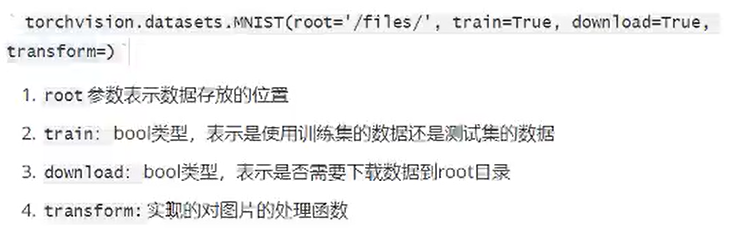

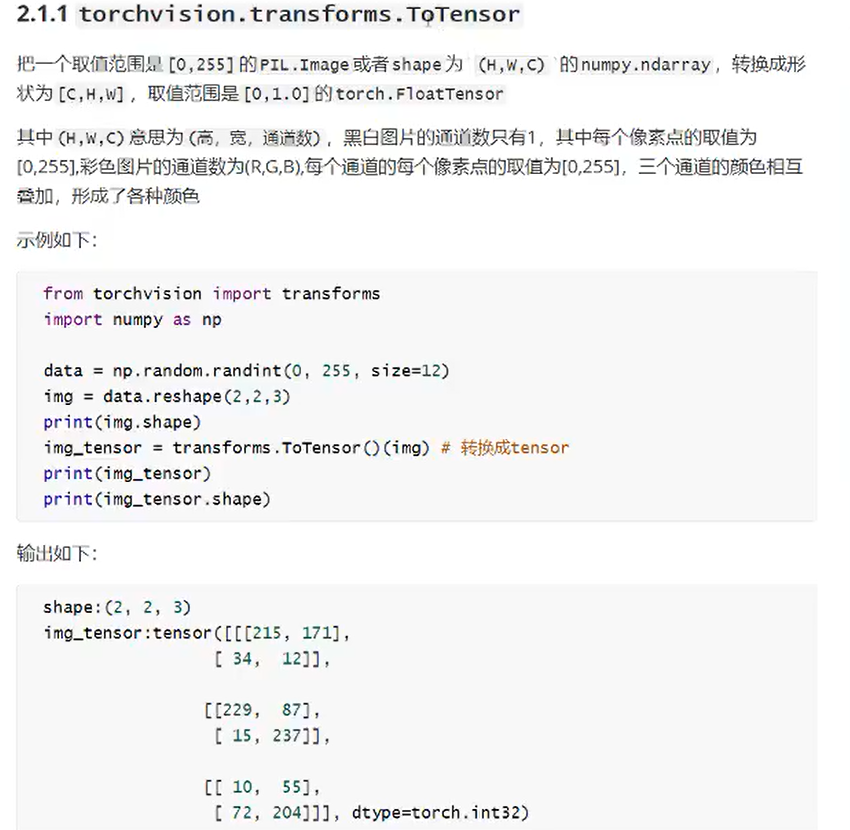

In [84]:
from torchvision import transforms
import numpy as np
data = np.random.randint(0,255,size=12)
img = data.reshape(2,2,3)
print(img.shape)
img_tensor = transforms.ToTensor()(img)
print(img_tensor)
print(img_tensor.shape)

(2, 2, 3)
tensor([[[149,  46],
         [219,  78]],

        [[ 45, 191],
         [132, 180]],

        [[200, 107],
         [164, 131]]], dtype=torch.int32)
torch.Size([3, 2, 2])


In [86]:
torch.tensor(img).transpose(0,2)

tensor([[[149, 219],
         [ 46,  78]],

        [[ 45, 132],
         [191, 180]],

        [[200, 164],
         [107, 131]]], dtype=torch.int32)

In [87]:
torch.tensor(img).permute(2,1,0)

tensor([[[149, 219],
         [ 46,  78]],

        [[ 45, 132],
         [191, 180]],

        [[200, 164],
         [107, 131]]], dtype=torch.int32)

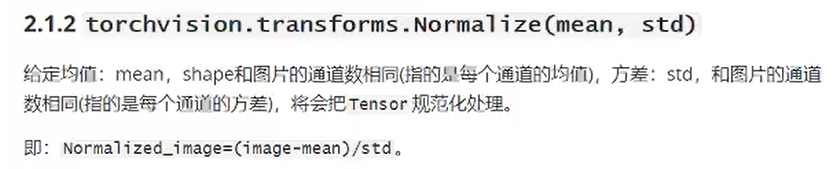

In [110]:
print(torch.tensor(img).permute(2,1,0),torch.tensor(img).permute(2,1,0).shape)
norm_img = transforms.Normalize((10,10,10),(2,2,2))(torch.tensor(img,dtype=torch.float64).permute(2,1,0))
print(norm_img)

tensor([[[149, 219],
         [ 46,  78]],

        [[ 45, 132],
         [191, 180]],

        [[200, 164],
         [107, 131]]], dtype=torch.int32) torch.Size([3, 2, 2])
tensor([[[ 69.5000, 104.5000],
         [ 18.0000,  34.0000]],

        [[ 17.5000,  61.0000],
         [ 90.5000,  85.0000]],

        [[ 95.0000,  77.0000],
         [ 48.5000,  60.5000]]], dtype=torch.float64)


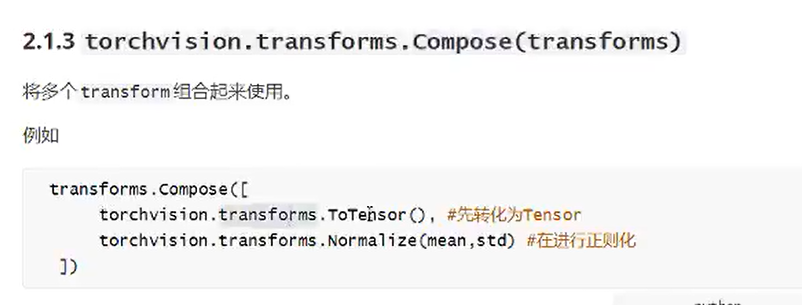

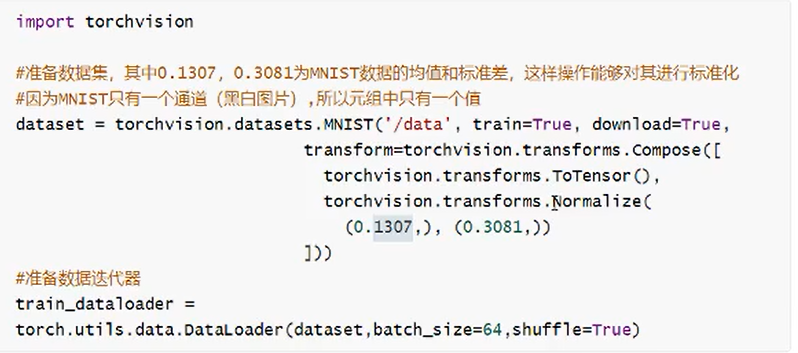

In [144]:
import torchvision 
dataset = torchvision.datasets.MNIST(root=r'C:\Users\刘东楷\mnist', #此处为自己定义的下载存在目录
                                     train=True,#返回训练集
                                     download=False,
                                     transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()
                                                                               ,torchvision.transforms.Normalize((0.3107),(0.3081))]))#自定义转换方式
print(dataset)
train_dataloader = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\刘东楷\mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.3107, std=0.3081)
           )


In [147]:
for i in train_dataloader:
    print(i[1])

tensor([8, 7, 7, 5, 1, 5, 7, 1, 6, 8, 8, 8, 2, 8, 1, 7, 6, 7, 8, 9, 2, 6, 2, 9,
        9, 7, 0, 1, 2, 6, 4, 8, 3, 7, 4, 3, 5, 9, 0, 5, 7, 8, 9, 5, 0, 1, 9, 3,
        4, 7, 8, 0, 4, 7, 9, 7, 9, 5, 9, 9, 6, 6, 6, 2])
tensor([4, 6, 6, 6, 8, 9, 2, 6, 2, 8, 8, 9, 4, 7, 9, 0, 5, 0, 1, 2, 0, 7, 5, 2,
        7, 1, 1, 9, 9, 9, 1, 3, 6, 3, 1, 1, 1, 5, 6, 5, 6, 4, 8, 4, 6, 1, 4, 0,
        1, 0, 3, 2, 8, 3, 8, 3, 2, 8, 0, 6, 1, 9, 7, 1])
tensor([2, 4, 0, 2, 0, 5, 2, 8, 3, 3, 9, 7, 0, 7, 8, 7, 7, 8, 5, 7, 9, 3, 3, 8,
        6, 5, 4, 0, 0, 5, 9, 4, 7, 6, 0, 9, 9, 9, 0, 5, 9, 7, 4, 3, 9, 1, 9, 9,
        5, 0, 1, 6, 2, 8, 0, 2, 7, 9, 6, 6, 9, 0, 7, 1])
tensor([2, 3, 5, 4, 6, 7, 9, 9, 4, 0, 1, 9, 4, 4, 4, 2, 2, 5, 6, 7, 9, 1, 8, 7,
        3, 6, 5, 4, 9, 4, 8, 7, 0, 6, 8, 9, 7, 5, 3, 4, 4, 2, 0, 9, 0, 2, 1, 7,
        1, 3, 8, 1, 5, 3, 6, 0, 9, 6, 3, 0, 0, 2, 6, 3])
tensor([3, 4, 6, 7, 7, 6, 9, 3, 2, 2, 8, 7, 4, 7, 6, 5, 0, 4, 6, 2, 4, 4, 7, 3,
        3, 2, 9, 9, 4, 3, 7, 1, 7, 4, 1, 4, 5, 6, 9,

        9, 5, 0, 4, 0, 5, 9, 6, 1, 2, 1, 2, 9, 1, 7, 0])
tensor([5, 0, 3, 8, 6, 0, 7, 7, 8, 0, 0, 1, 8, 5, 5, 5, 6, 8, 5, 5, 0, 1, 1, 5,
        4, 6, 2, 3, 8, 3, 8, 1, 4, 6, 2, 1, 4, 1, 2, 5, 1, 8, 3, 4, 7, 4, 2, 7,
        9, 6, 6, 5, 3, 2, 1, 3, 7, 5, 1, 5, 2, 6, 9, 7])
tensor([1, 5, 3, 1, 2, 9, 7, 0, 3, 0, 9, 6, 1, 7, 3, 3, 5, 8, 1, 6, 3, 0, 4, 2,
        7, 9, 8, 5, 6, 6, 8, 4, 8, 5, 6, 5, 5, 3, 7, 2, 5, 7, 6, 8, 3, 1, 3, 8,
        9, 1, 6, 4, 4, 1, 3, 7, 2, 8, 8, 4, 6, 9, 8, 5])
tensor([6, 7, 1, 0, 4, 2, 6, 9, 7, 1, 5, 2, 3, 9, 9, 9, 4, 1, 5, 1, 1, 8, 7, 1,
        8, 9, 8, 1, 7, 5, 7, 1, 4, 8, 0, 5, 1, 7, 9, 5, 1, 2, 3, 3, 4, 0, 7, 0,
        2, 4, 8, 2, 3, 5, 7, 9, 2, 4, 1, 5, 2, 9, 2, 3])
tensor([5, 2, 0, 5, 8, 7, 8, 8, 0, 4, 5, 3, 9, 4, 6, 1, 2, 3, 3, 5, 3, 2, 6, 0,
        8, 9, 2, 8, 5, 8, 7, 0, 0, 2, 8, 6, 0, 1, 6, 1, 5, 5, 6, 2, 4, 4, 5, 0,
        5, 2, 1, 4, 4, 2, 6, 8, 1, 3, 2, 7, 8, 9, 9, 2])
tensor([7, 3, 5, 0, 4, 0, 0, 1, 4, 5, 3, 0, 5, 4, 9, 1, 2, 5, 8, 3, 2, 4, 0

        2, 5, 4, 0, 2, 3, 2, 5, 9, 8, 4, 0, 1, 5, 7, 2])
tensor([1, 9, 6, 0, 7, 9, 1, 2, 2, 8, 1, 8, 8, 3, 3, 2, 3, 4, 5, 4, 1, 6, 1, 3,
        8, 1, 1, 5, 8, 4, 9, 2, 3, 0, 4, 4, 3, 2, 5, 9, 6, 6, 9, 2, 9, 0, 0, 0,
        6, 6, 7, 9, 6, 2, 5, 4, 8, 0, 4, 5, 3, 4, 1, 0])
tensor([3, 0, 1, 7, 9, 7, 4, 9, 9, 9, 1, 2, 9, 0, 6, 8, 0, 6, 2, 8, 9, 1, 4, 6,
        1, 6, 0, 4, 6, 7, 5, 9, 7, 3, 4, 5, 3, 8, 1, 6, 7, 0, 4, 1, 5, 7, 4, 8,
        1, 7, 1, 7, 8, 5, 9, 5, 9, 9, 1, 7, 0, 4, 1, 7])
tensor([1, 9, 7, 0, 5, 5, 1, 1, 5, 7, 5, 5, 9, 5, 3, 6, 1, 2, 8, 8, 7, 6, 8, 7,
        3, 1, 3, 5, 3, 5, 8, 2, 6, 0, 6, 7, 8, 3, 8, 7, 9, 5, 2, 8, 3, 8, 9, 3,
        2, 2, 4, 7, 6, 1, 6, 4, 5, 4, 7, 6, 7, 1, 3, 1])
tensor([3, 3, 6, 9, 9, 6, 5, 2, 7, 1, 7, 9, 6, 4, 9, 2, 3, 2, 3, 6, 4, 1, 9, 8,
        6, 0, 1, 6, 9, 3, 0, 7, 0, 9, 7, 8, 9, 5, 5, 0, 1, 7, 3, 8, 4, 7, 1, 6,
        6, 9, 3, 0, 4, 8, 3, 1, 2, 0, 1, 8, 1, 1, 9, 7])
tensor([8, 6, 6, 3, 7, 9, 8, 0, 2, 9, 2, 2, 7, 8, 7, 6, 0, 6, 3, 4, 3, 7, 3

        5, 5, 8, 3, 1, 2, 1, 1, 9, 3, 8, 7, 0, 9, 3, 3])
tensor([0, 5, 8, 8, 3, 5, 6, 8, 3, 7, 0, 3, 6, 7, 1, 4, 7, 8, 3, 2, 2, 3, 4, 6,
        4, 7, 3, 7, 9, 1, 1, 0, 2, 1, 6, 1, 4, 1, 2, 3, 4, 4, 5, 4, 6, 5, 7, 6,
        1, 5, 7, 8, 1, 1, 7, 4, 6, 8, 0, 1, 9, 7, 6, 9])
tensor([1, 3, 7, 4, 6, 0, 9, 2, 9, 1, 5, 4, 9, 9, 5, 1, 7, 0, 3, 5, 3, 7, 5, 0,
        5, 2, 5, 0, 0, 1, 8, 6, 2, 6, 2, 9, 1, 2, 7, 1, 4, 3, 2, 2, 2, 8, 9, 7,
        3, 5, 9, 6, 8, 3, 2, 0, 3, 8, 6, 6, 5, 0, 6, 0])
tensor([0, 3, 0, 2, 5, 8, 9, 4, 9, 5, 9, 0, 5, 7, 9, 0, 2, 1, 1, 4, 0, 6, 8, 0,
        5, 1, 8, 6, 1, 6, 8, 8, 4, 1, 4, 4, 9, 1, 4, 1, 2, 8, 7, 7, 9, 2, 2, 1,
        7, 2, 2, 9, 2, 5, 4, 6, 9, 2, 7, 1, 3, 8, 7, 0])
tensor([0, 0, 8, 0, 9, 0, 5, 9, 0, 5, 2, 3, 2, 5, 2, 1, 0, 6, 0, 0, 1, 3, 3, 2,
        7, 7, 6, 7, 5, 2, 7, 0, 5, 0, 2, 6, 0, 8, 7, 4, 4, 6, 6, 2, 2, 0, 5, 4,
        0, 5, 7, 5, 3, 1, 8, 2, 4, 8, 6, 7, 3, 0, 3, 0])
tensor([8, 4, 9, 3, 0, 9, 1, 8, 4, 4, 9, 3, 9, 6, 1, 1, 6, 2, 9, 0, 2, 9, 7

        1, 5, 4, 0, 5, 6, 9, 4, 6, 3, 9, 6, 4, 5, 9, 5])
tensor([6, 5, 4, 6, 7, 9, 7, 3, 6, 9, 4, 1, 5, 5, 6, 1, 4, 8, 5, 6, 0, 4, 7, 4,
        1, 4, 4, 7, 9, 2, 1, 8, 1, 8, 7, 8, 3, 6, 9, 7, 5, 3, 4, 4, 0, 1, 4, 3,
        0, 8, 7, 1, 4, 0, 9, 5, 8, 3, 7, 1, 6, 8, 9, 7])
tensor([2, 1, 9, 3, 5, 9, 8, 6, 7, 2, 8, 8, 7, 7, 1, 1, 7, 3, 2, 6, 0, 7, 9, 7,
        5, 9, 6, 5, 4, 0, 0, 3, 7, 6, 9, 1, 7, 1, 7, 2, 9, 9, 5, 2, 4, 0, 9, 5,
        3, 0, 5, 6, 3, 9, 1, 8, 3, 0, 7, 5, 0, 9, 7, 9])
tensor([7, 2, 1, 1, 4, 7, 7, 1, 9, 6, 5, 8, 3, 7, 7, 3, 9, 9, 5, 3, 3, 8, 3, 8,
        2, 1, 2, 4, 8, 9, 3, 3, 1, 1, 3, 8, 3, 9, 3, 2, 5, 8, 9, 3, 8, 3, 9, 7,
        4, 7, 1, 1, 4, 6, 4, 5, 2, 8, 1, 7, 3, 6, 9, 9])
tensor([1, 4, 3, 0, 3, 9, 9, 8, 1, 7, 7, 9, 8, 7, 4, 2, 2, 7, 4, 3, 3, 5, 4, 7,
        9, 7, 7, 9, 8, 7, 5, 6, 4, 1, 5, 8, 2, 0, 3, 8, 0, 1, 3, 1, 8, 4, 2, 6,
        3, 0, 8, 8, 0, 5, 1, 3, 2, 6, 8, 5, 8, 6, 1, 5])
tensor([4, 6, 2, 7, 4, 8, 4, 5, 0, 2, 4, 5, 0, 8, 3, 2, 5, 8, 5, 8, 1, 3, 1

        3, 3, 7, 6, 0, 3, 4, 3, 2, 4, 7, 1, 2, 0, 3, 2])
tensor([3, 4, 6, 7, 1, 1, 3, 3, 4, 8, 2, 2, 7, 8, 5, 3, 7, 2, 2, 7, 3, 0, 6, 7,
        2, 0, 5, 4, 9, 9, 6, 0, 1, 5, 1, 7, 0, 9, 9, 9, 7, 7, 7, 8, 1, 2, 3, 3,
        2, 4, 3, 7, 6, 4, 9, 7, 9, 2, 0, 7, 5, 9, 8, 0])
tensor([9, 9, 0, 9, 7, 7, 4, 3, 6, 0, 1, 2, 6, 8, 3, 8, 7, 1, 0, 3, 8, 4, 7, 7,
        0, 0, 1, 6, 8, 3, 9, 5, 3, 0, 3, 1, 4, 8, 5, 2, 6, 9, 7, 2, 7, 3, 5, 2,
        1, 7, 6, 0, 2, 7, 2, 7, 3, 8, 9, 4, 0, 9, 2, 0])
tensor([4, 9, 2, 0, 1, 9, 0, 1, 5, 3, 0, 4, 8, 7, 1, 8, 8, 0, 9, 3, 3, 6, 7, 4,
        1, 5, 6, 9, 7, 1, 3, 4, 7, 4, 4, 9, 7, 2, 8, 0, 8, 3, 7, 1, 3, 8, 4, 6,
        1, 0, 5, 7, 7, 5, 6, 2, 4, 6, 7, 4, 3, 1, 3, 2])
tensor([4, 3, 1, 9, 4, 1, 0, 5, 2, 5, 0, 5, 3, 8, 3, 1, 2, 8, 0, 0, 1, 5, 1, 9,
        8, 4, 2, 6, 3, 1, 0, 9, 7, 4, 0, 6, 8, 3, 2, 2, 9, 9, 8, 3, 1, 0, 4, 8,
        8, 0, 0, 1, 8, 8, 5, 3, 2, 2, 5, 4, 2, 0, 6, 8])
tensor([7, 3, 3, 9, 8, 2, 9, 0, 6, 9, 6, 2, 3, 0, 0, 4, 5, 0, 5, 2, 4, 0, 9

        8, 1, 1, 0, 6, 5, 9, 1, 7, 9, 7, 5, 7, 1, 1, 7])
tensor([2, 6, 0, 0, 9, 8, 1, 6, 6, 9, 9, 4, 8, 6, 4, 9, 4, 4, 2, 4, 7, 8, 7, 2,
        5, 4, 7, 1, 0, 3, 2, 2, 5, 3, 0, 8, 3, 8, 3, 7, 2, 9, 0, 2, 8, 2, 1, 7,
        8, 2, 1, 8, 1, 4, 2, 9, 4, 2, 1, 8, 8, 1, 0, 9])
tensor([2, 7, 8, 3, 3, 8, 6, 2, 9, 3, 5, 7, 0, 2, 4, 7, 2, 6, 8, 8, 5, 2, 2, 4,
        1, 6, 6, 8, 4, 3, 5, 0, 0, 2, 0, 3, 3, 1, 8, 1, 1, 8, 7, 6, 7, 1, 2, 0,
        0, 2, 4, 1, 7, 6, 9, 7, 7, 8, 8, 4, 4, 5, 7, 0])
tensor([4, 2, 3, 1, 3, 7, 1, 4, 4, 6, 2, 3, 6, 6, 2, 1, 2, 2, 0, 2, 0, 4, 4, 3,
        1, 2, 7, 3, 6, 5, 9, 4, 5, 6, 8, 0, 8, 5, 6, 9, 1, 1, 2, 0, 8, 5, 0, 3,
        1, 1, 0, 8, 1, 3, 9, 9, 6, 4, 5, 6, 5, 6, 7, 7])
tensor([1, 3, 3, 5, 5, 6, 5, 4, 2, 1, 6, 9, 0, 9, 7, 9, 0, 1, 5, 9, 2, 0, 2, 9,
        5, 0, 1, 2, 2, 6, 7, 8, 1, 6, 2, 7, 5, 2, 3, 2, 5, 8, 5, 8, 2, 8, 2, 0,
        6, 9, 9, 4, 6, 5, 7, 3, 2, 2, 3, 0, 7, 4, 3, 2])
tensor([4, 4, 2, 3, 3, 3, 8, 6, 8, 9, 0, 6, 8, 3, 1, 3, 3, 1, 6, 8, 0, 4, 9

        8, 0, 2, 5, 7, 0, 1, 2, 6, 9, 8, 0, 1, 9, 6, 3])
tensor([8, 6, 0, 9, 0, 6, 3, 0, 1, 2, 8, 6, 6, 7, 2, 0, 3, 2, 8, 9, 9, 6, 1, 4,
        1, 8, 1, 0, 9, 6, 7, 9, 5, 2, 3, 0, 1, 5, 1, 5, 2, 5, 8, 5, 4, 5, 1, 1,
        3, 5, 1, 4, 2, 4, 2, 7, 7, 1, 5, 0, 1, 2, 2, 3])
tensor([4, 8, 9, 0, 7, 8, 5, 5, 4, 0, 1, 5, 9, 7, 2, 2, 2, 4, 9, 0, 0, 4, 4, 2,
        5, 4, 1, 7, 3, 6, 6, 1, 2, 1, 2, 4, 2, 6, 7, 1, 3, 6, 1, 6, 3, 9, 1, 0,
        8, 4, 1, 5, 8, 7, 7, 1, 7, 6, 9, 2, 9, 0, 0, 7])
tensor([5, 5, 1, 5, 0, 3, 8, 1, 0, 4, 4, 4, 2, 1, 6, 7, 2, 1, 8, 8, 7, 1, 2, 5,
        6, 4, 2, 2, 4, 0, 8, 9, 6, 9, 9, 3, 0, 5, 1, 4, 0, 4, 1, 5, 6, 6, 4, 6,
        9, 4, 0, 6, 0, 7, 9, 4, 3, 1, 4, 5, 9, 5, 5, 9])
tensor([2, 5, 3, 7, 4, 2, 1, 0, 5, 6, 6, 3, 1, 8, 7, 8, 6, 4, 7, 6, 3, 9, 0, 1,
        2, 4, 7, 4, 2, 3, 6, 5, 8, 5, 4, 5, 0, 4, 7, 9, 7, 6, 5, 0, 8, 2, 4, 7,
        1, 7, 7, 1, 9, 4, 8, 8, 7, 4, 7, 6, 0, 4, 1, 0])
tensor([6, 8, 4, 1, 2, 4, 1, 4, 8, 1, 9, 9, 3, 4, 5, 9, 0, 7, 5, 5, 1, 1, 9

        5, 3, 5, 8, 6, 8, 9, 0, 3, 7, 1, 2, 3, 1, 9, 0])
tensor([3, 1, 0, 1, 6, 4, 9, 4, 5, 5, 7, 7, 2, 4, 7, 3, 4, 5, 0, 6, 7, 2, 3, 8,
        6, 7, 7, 5, 3, 4, 5, 4, 1, 7, 0, 2, 2, 9, 3, 1, 4, 1, 0, 9, 5, 4, 0, 1,
        3, 1, 2, 7, 7, 0, 0, 1, 2, 9, 9, 2, 3, 3, 1, 0])
tensor([4, 5, 1, 8, 4, 0, 0, 7, 4, 7, 4, 8, 1, 3, 1, 6, 3, 9, 1, 6, 9, 1, 4, 4,
        1, 8, 7, 4, 0, 8, 7, 3, 1, 2, 4, 4, 2, 8, 5, 1, 1, 6, 3, 2, 4, 5, 3, 7,
        8, 8, 6, 5, 4, 0, 0, 9, 0, 7, 5, 6, 2, 6, 2, 0])
tensor([6, 8, 1, 3, 8, 1, 7, 4, 2, 6, 7, 1, 8, 5, 6, 1, 4, 0, 0, 2, 1, 4, 9, 9,
        4, 3, 6, 0, 1, 4, 0, 4, 2, 7, 6, 4, 3, 7, 5, 2, 5, 6, 8, 9, 0, 3, 4, 5,
        1, 9, 7, 7, 3, 6, 2, 6, 8, 4, 9, 7, 7, 7, 3, 7])
tensor([2, 9, 4, 3, 0, 8, 6, 5, 3, 8, 9, 6, 5, 6, 1, 8, 8, 5, 9, 5, 4, 4, 0, 6,
        5, 7, 6, 8, 0, 7, 5, 9, 6, 1, 3, 1, 7, 9, 5, 8, 4, 2, 8, 1, 3, 9, 6, 2,
        8, 4, 0, 7, 0, 3, 9, 4, 6, 3, 0, 8, 0, 3, 0, 1])
tensor([5, 2, 9, 8, 6, 9, 1, 3, 9, 5, 7, 0, 9, 3, 1, 1, 1, 9, 2, 0, 2, 2, 7

        5, 0, 0, 7, 1, 5, 0, 2, 5, 2, 0, 5, 6, 5, 6, 2])
tensor([3, 5, 6, 0, 4, 0, 2, 6, 5, 2, 2, 2, 9, 3, 1, 3, 4, 9, 3, 7, 4, 5, 4, 1,
        9, 0, 6, 1, 7, 7, 5, 8, 3, 5, 5, 3, 5, 6, 8, 9, 6, 2, 6, 1, 5, 7, 1, 0,
        5, 0, 9, 0, 3, 3, 5, 8, 7, 1, 6, 2, 9, 6, 6, 7])
tensor([0, 4, 3, 6, 4, 4, 0, 3, 1, 3, 3, 5, 1, 1, 4, 0, 8, 2, 1, 7, 4, 5, 8, 6,
        0, 1, 2, 4, 8, 5, 9, 8, 9, 0, 1, 9, 5, 5, 1, 4, 9, 3, 0, 6, 3, 7, 3, 3,
        8, 7, 7, 9, 4, 1, 3, 7, 6, 0, 5, 0, 3, 8, 4, 8])
tensor([8, 8, 2, 5, 3, 4, 8, 3, 9, 7, 4, 9, 3, 2, 2, 0, 2, 9, 7, 2, 0, 0, 8, 4,
        2, 9, 6, 4, 3, 4, 1, 9, 3, 3, 5, 7, 6, 1, 1, 6, 1, 0, 5, 0, 7, 0, 7, 1,
        2, 2, 1, 0, 2, 6, 4, 1, 1, 8, 0, 3, 3, 7, 4, 5])
tensor([0, 4, 1, 1, 6, 2, 6, 6, 6, 2, 2, 7, 8, 3, 7, 3, 7, 1, 5, 6, 3, 1, 0, 7,
        3, 8, 7, 4, 8, 7, 4, 4, 7, 1, 2, 1, 5, 8, 3, 0, 0, 2, 3, 7, 4, 3, 2, 0,
        9, 9, 6, 0, 0, 9, 3, 8, 1, 3, 8, 1, 4, 7, 1, 7])
tensor([3, 9, 2, 0, 4, 2, 4, 7, 8, 7, 2, 1, 8, 5, 0, 4, 6, 4, 8, 4, 3, 9, 7

        5, 6, 2, 8, 9, 7, 2, 3, 7, 8, 5, 7, 8, 6, 4, 5])
tensor([1, 4, 1, 4, 5, 0, 6, 6, 3, 1, 8, 4, 4, 7, 0, 9, 0, 4, 1, 6, 7, 5, 1, 0,
        7, 6, 8, 1, 9, 7, 0, 1, 2, 3, 1, 7, 1, 5, 8, 7, 0, 1, 4, 4, 6, 8, 3, 5,
        1, 3, 3, 4, 5, 8, 7, 6, 9, 0, 7, 4, 2, 9, 0, 8])
tensor([0, 5, 0, 4, 4, 5, 4, 5, 6, 7, 4, 9, 4, 1, 4, 1, 0, 0, 5, 5, 3, 8, 5, 5,
        0, 6, 1, 0, 2, 2, 8, 4, 3, 0, 0, 6, 8, 4, 8, 7, 9, 6, 0, 5, 1, 2, 8, 3,
        1, 8, 7, 7, 2, 8, 3, 4, 6, 4, 4, 0, 9, 8, 9, 8])
tensor([3, 6, 3, 7, 3, 7, 9, 7, 3, 7, 1, 4, 6, 8, 1, 7, 1, 1, 0, 3, 9, 9, 0, 4,
        3, 9, 6, 3, 1, 0, 4, 0, 8, 3, 0, 8, 0, 2, 8, 5, 7, 3, 7, 3, 2, 7, 2, 3,
        8, 1, 7, 6, 2, 1, 4, 3, 1, 9, 2, 1, 2, 5, 3, 6])
tensor([1, 1, 2, 0, 0, 1, 5, 3, 9, 8, 7, 0, 5, 7, 4, 0, 1, 1, 7, 1, 7, 3, 8, 7,
        1, 2, 1, 0, 9, 9, 0, 3, 4, 2, 5, 8, 8, 5, 3, 8, 1, 2, 4, 6, 4, 3, 6, 6,
        8, 4, 0, 3, 0, 2, 6, 8, 1, 6, 6, 7, 7, 2, 5, 3])
tensor([0, 1, 9, 5, 6, 1, 0, 4, 3, 4, 7, 7, 7, 9, 1, 3, 3, 0, 3, 2, 8, 8, 2

        7, 4, 9, 8, 3, 0, 1, 7, 1, 1, 7, 3, 4, 3, 8, 6])
tensor([9, 1, 2, 9, 5, 0, 4, 2, 7, 5, 1, 7, 7, 8, 0, 3, 4, 0, 2, 2, 7, 0, 7, 2,
        0, 7, 0, 2, 1, 8, 0, 9, 0, 7, 0, 5, 3, 9, 4, 2, 1, 2, 0, 3, 9, 3, 7, 9,
        3, 8, 4, 0, 0, 5, 7, 2, 5, 1, 0, 4, 4, 9, 5, 5])
tensor([3, 5, 1, 6, 6, 4, 6, 1, 5, 2, 6, 1, 1, 7, 5, 7, 8, 6, 2, 3, 3, 2, 8, 4,
        7, 6, 9, 1, 6, 6, 9, 9, 7, 4, 2, 9, 2, 0, 4, 5, 5, 8, 3, 2, 8, 4, 9, 0,
        8, 9, 2, 7, 9, 4, 2, 0, 9, 4, 5, 5, 1, 5, 2, 8])
tensor([1, 8, 2, 2, 6, 7, 1, 6, 8, 8, 7, 1, 3, 9, 3, 8, 8, 3, 6, 0, 1, 4, 1, 0,
        1, 7, 0, 9, 5, 2, 0, 7, 1, 4, 9, 9, 5, 4, 3, 0, 5, 5, 2, 9, 0, 7, 6, 7,
        0, 0, 8, 5, 9, 2, 7, 3, 8, 2, 5, 0, 7, 3, 0, 7])
tensor([5, 5, 5, 0, 2, 3, 6, 9, 9, 4, 3, 7, 2, 3, 0, 4, 4, 1, 4, 4, 7, 5, 1, 6,
        2, 1, 6, 6, 3, 3, 9, 1, 6, 6, 8, 1, 2, 5, 6, 2, 9, 1, 1, 8, 7, 9, 7, 6,
        9, 9, 0, 1, 7, 8, 5, 8, 8, 6, 8, 8, 9, 1, 0, 2])
tensor([4, 7, 4, 4, 4, 4, 7, 6, 1, 5, 3, 2, 0, 6, 3, 3, 1, 3, 1, 2, 5, 0, 6

        0, 0, 5, 3, 9, 5, 5, 3, 1, 4, 0, 9, 0, 0, 6, 1])
tensor([0, 3, 8, 3, 5, 1, 8, 9, 3, 6, 8, 3, 0, 5, 1, 2, 2, 0, 6, 4, 3, 3, 5, 5,
        8, 4, 1, 0, 2, 9, 5, 0, 9, 5, 0, 6, 2, 6, 1, 0, 9, 8, 1, 3, 8, 6, 2, 2,
        6, 1, 8, 9, 8, 6, 3, 3, 1, 2, 4, 2, 4, 5, 2, 6])
tensor([7, 8, 3, 9, 7, 9, 9, 3, 7, 0, 9, 1, 7, 8, 0, 0, 2, 3, 2, 8, 7, 9, 3, 9,
        6, 2, 9, 2, 1, 4, 9, 8, 1, 8, 2, 5, 6, 7, 1, 3, 6, 8, 7, 3, 9, 5, 7, 3,
        6, 4, 9, 5, 9, 8, 7, 4, 3, 1, 3, 8, 6, 7, 5, 3])
tensor([7, 6, 0, 9, 2, 5, 3, 2, 1, 5, 0, 5, 6, 1, 2, 3, 6, 1, 8, 7, 0, 0, 7, 6,
        1, 1, 5, 7, 3, 5, 6, 2, 6, 6, 5, 5, 9, 5, 7, 3, 7, 9, 2, 5, 0, 1, 1, 0,
        1, 1, 2, 6, 2, 0, 9, 0, 1, 6, 9, 2, 9, 3, 6, 8])
tensor([6, 3, 2, 4, 2, 6, 2, 6, 4, 9, 6, 0, 2, 7, 6, 1, 4, 1, 2, 2, 0, 9, 0, 6,
        8, 6, 0, 9, 9, 5, 5, 1, 0, 2, 8, 4, 5, 9, 4, 6, 8, 0, 8, 5, 3, 1, 3, 6,
        4, 2, 9, 1, 7, 1, 6, 9, 1, 9, 0, 9, 4, 1, 1, 4])
tensor([2, 2, 0, 3, 1, 0, 3, 9, 5, 5, 8, 1, 0, 6, 0, 4, 3, 2, 0, 1, 3, 3, 4

        3, 4, 9, 3, 8, 4, 6, 3, 9, 9, 0, 9, 0, 8, 8, 3])
tensor([3, 8, 2, 8, 5, 5, 8, 6, 2, 5, 4, 1, 5, 2, 6, 7, 6, 1, 2, 4, 8, 5, 0, 9,
        7, 3, 9, 4, 4, 2, 1, 1, 2, 7, 3, 9, 9, 5, 7, 7, 9, 9, 0, 9, 8, 1, 1, 0,
        3, 0, 2, 9, 3, 6, 7, 4, 9, 8, 0, 8, 9, 1, 9, 1])
tensor([6, 4, 1, 7, 1, 7, 0, 7, 7, 9, 3, 4, 2, 9, 9, 4, 9, 5, 4, 8, 8, 5, 5, 4,
        9, 3, 9, 6, 6, 1, 9, 6, 7, 8, 2, 0, 6, 3, 6, 3, 0, 4, 1, 1, 5, 4, 0, 4,
        6, 8, 0, 0, 6, 8, 4, 5, 2, 8, 0, 7, 0, 0, 2, 2])
tensor([0, 1, 1, 8, 8, 7, 7, 5, 0, 1, 0, 8, 2, 3, 0, 8, 9, 8, 3, 3, 7, 3, 4, 4,
        6, 1, 2, 4, 0, 0, 9, 3, 6, 2, 7, 8, 4, 7, 9, 0, 6, 0, 9, 3, 4, 1, 7, 6,
        9, 1, 4, 1, 4, 9, 4, 7, 2, 2, 0, 2, 5, 4, 4, 2])
tensor([4, 0, 8, 2, 7, 3, 2, 2, 5, 1, 0, 8, 1, 0, 6, 5, 0, 9, 4, 8, 0, 7, 4, 1,
        9, 9, 2, 8, 0, 1, 5, 4, 3, 0, 1, 1, 3, 4, 2, 5, 1, 5, 4, 8, 3, 1, 8, 9,
        7, 4, 2, 1, 9, 3, 6, 8, 6, 3, 1, 5, 9, 0, 1, 4])
tensor([8, 4, 1, 9, 0, 7, 7, 0, 7, 7, 4, 5, 2, 8, 7, 5, 4, 5, 2, 0, 1, 1, 9

        0, 2, 2, 2, 8, 3, 5, 9, 2, 3, 7, 9, 4, 5, 6, 8])
tensor([0, 1, 5, 9, 9, 2, 1, 6, 6, 7, 2, 4, 8, 5, 3, 9, 1, 4, 1, 9, 9, 3, 1, 7,
        7, 8, 3, 9, 7, 2, 9, 6, 4, 0, 4, 8, 1, 3, 5, 8, 7, 3, 8, 0, 8, 1, 9, 3,
        8, 3, 4, 3, 1, 1, 6, 2, 6, 5, 3, 6, 2, 4, 1, 5])
tensor([6, 2, 9, 3, 1, 0, 3, 7, 9, 1, 3, 3, 5, 1, 2, 0, 8, 6, 5, 0, 3, 2, 3, 4,
        3, 6, 0, 0, 7, 1, 1, 6, 6, 2, 8, 2, 7, 5, 9, 6, 3, 5, 2, 7, 0, 8, 8, 2,
        2, 3, 3, 4, 9, 2, 7, 0, 0, 2, 8, 2, 9, 7, 5, 6])
tensor([9, 4, 9, 3, 3, 5, 5, 6, 7, 2, 0, 1, 3, 6, 8, 0, 5, 5, 0, 0, 3, 7, 1, 6,
        4, 8, 1, 4, 1, 7, 0, 9, 8, 0, 5, 7, 3, 4, 4, 2, 5, 9, 5, 9, 2, 3, 6, 5,
        9, 7, 9, 5, 4, 9, 3, 9, 2, 4, 5, 4, 1, 9, 3, 1])
tensor([5, 0, 8, 9, 8, 8, 4, 0, 1, 7, 6, 7, 0, 0, 0, 4, 9, 6, 8, 0, 5, 4, 3, 9,
        8, 8, 4, 9, 3, 6, 4, 6, 9, 8, 8, 6, 4, 7, 4, 8, 0, 1, 2, 4, 4, 8, 6, 0,
        1, 3, 4, 6, 3, 3, 6, 0, 3, 9, 1, 7, 2, 3, 3, 8])
tensor([2, 2, 6, 1, 5, 2, 1, 3, 7, 4, 3, 3, 2, 6, 8, 7, 7, 9, 9, 6, 6, 8, 3

        0, 7, 6, 3, 5, 5, 1, 2, 9, 4, 9, 1, 5, 3, 9, 1])
tensor([6, 2, 0, 3, 7, 4, 2, 0, 2, 6, 1, 9, 9, 3, 6, 8, 3, 1, 0, 2, 6, 0, 8, 1,
        4, 3, 1, 2, 5, 7, 5, 3, 3, 3, 0, 8, 3, 3, 7, 1, 7, 0, 7, 1, 5, 3, 2, 5,
        8, 5, 8, 6, 7, 2, 2, 4, 2, 5, 9, 4, 2, 9, 3, 3])
tensor([0, 4, 0, 5, 5, 0, 0, 8, 1, 8, 7, 5, 6, 9, 9, 6, 6, 2, 1, 9, 8, 7, 4, 9,
        9, 7, 7, 8, 6, 2, 7, 1, 0, 5, 0, 6, 1, 2, 1, 3, 8, 8, 7, 1, 0, 9, 9, 3,
        0, 8, 0, 8, 1, 2, 3, 6, 1, 9, 3, 4, 8, 0, 4, 2])
tensor([2, 8, 0, 2, 6, 8, 4, 2, 4, 3, 9, 1, 7, 6, 3, 4, 9, 7, 5, 9, 3, 2, 7, 8,
        1, 7, 2, 1, 5, 4, 0, 8, 0, 9, 9, 3, 1, 4, 9, 1, 6, 5, 1, 2, 6, 6, 8, 1,
        4, 0, 1, 8, 5, 7, 6, 4, 2, 8, 2, 2, 9, 6, 7, 4])
tensor([3, 0, 7, 5, 9, 4, 3, 5, 4, 0, 0, 9, 9, 6, 2, 7, 5, 8, 3, 7, 6, 6, 5, 5,
        4, 8, 1, 9, 2, 8, 4, 4, 8, 8, 3, 6, 5, 1, 3, 9, 2, 5, 3, 3, 3, 5, 0, 0,
        2, 2, 0, 0, 8, 9, 0, 1, 4, 3, 2, 1, 6, 7, 8, 8])
tensor([2, 5, 7, 5, 6, 5, 7, 1, 6, 9, 5, 5, 3, 7, 7, 0, 9, 4, 0, 7, 2, 8, 8

        4, 2, 0, 2, 8, 8, 3, 9, 9, 3, 2, 0, 4, 1, 4, 2])
tensor([9, 2, 7, 5, 4, 4, 3, 5, 5, 7, 6, 7, 8, 0, 3, 3, 7, 5, 3, 5, 0, 4, 1, 2,
        0, 0, 3, 2, 1, 7, 5, 2, 2, 4, 0, 5, 2, 4, 6, 2, 5, 8, 7, 2, 7, 4, 3, 4,
        5, 0, 1, 9, 8, 4, 0, 1, 7, 7, 3, 2, 0, 6, 9, 6])
tensor([7, 1, 6, 7, 0, 7, 3, 8, 5, 1, 9, 8, 4, 3, 8, 1, 8, 3, 2, 1, 9, 7, 5, 6,
        8, 9, 1, 5, 7, 8, 1, 9, 6, 1, 6, 3, 2, 4, 1, 3, 3, 1, 3, 5, 0, 8, 5, 3,
        3, 0, 5, 7, 9, 3, 3, 7, 4, 4, 3, 5, 7, 7, 9, 0])
tensor([4, 0, 9, 4, 9, 4, 4, 3, 9, 5, 5, 9, 4, 5, 5, 4, 5, 2, 6, 3, 8, 3, 6, 6,
        6, 2, 0, 8, 2, 9, 8, 3, 2, 6, 6, 6, 9, 1, 6, 8, 4, 7, 8, 1, 3, 0, 7, 5,
        2, 5, 5, 2, 8, 2, 9, 6, 9, 5, 8, 5, 2, 0, 3, 3])
tensor([6, 3, 0, 2, 4, 2, 3, 8, 2, 9, 8, 0, 1, 6, 0, 6, 2, 1, 8, 8, 0, 7, 2, 0,
        0, 6, 8, 2, 3, 3, 1, 4, 7, 2, 4, 2, 9, 0, 7, 9, 8, 1, 5, 2, 1, 2, 3, 6,
        8, 3, 3, 2, 8, 7, 6, 5, 8, 7, 4, 7, 2, 7, 7, 2])
tensor([0, 8, 1, 9, 9, 3, 1, 6, 5, 4, 3, 0, 9, 3, 7, 7, 7, 2, 9, 8, 3, 7, 3

        6, 7, 0, 1, 0, 6, 1, 8, 9, 6, 1, 6, 4, 3, 4, 9])
tensor([0, 5, 6, 5, 0, 7, 3, 6, 1, 1, 4, 6, 5, 7, 3, 1, 4, 5, 2, 4, 5, 7, 6, 6,
        9, 2, 7, 3, 8, 3, 7, 3, 3, 1, 8, 6, 3, 6, 4, 9, 9, 5, 9, 8, 3, 5, 4, 5,
        4, 8, 2, 1, 4, 1, 3, 0, 3, 9, 9, 1, 2, 9, 6, 6])
tensor([4, 2, 8, 3, 1, 5, 7, 0, 6, 9, 3, 5, 7, 3, 6, 4, 9, 3, 9, 3, 7, 3, 4, 3,
        8, 2, 4, 3, 7, 1, 9, 2, 0, 5, 3, 4, 2, 6, 5, 3, 9, 3, 3, 0, 9, 1, 5, 6,
        1, 1, 6, 9, 6, 7, 1, 7, 8, 1, 2, 9, 3, 9, 4, 3])
tensor([6, 8, 9, 1, 0, 7, 9, 3, 8, 7, 6, 1, 8, 2, 7, 8, 1, 8, 5, 1, 4, 1, 2, 8,
        5, 8, 9, 4, 7, 9, 8, 4, 3, 3, 6, 9, 3, 9, 5, 6, 0, 2, 9, 8, 7, 9, 1, 9,
        7, 3, 3, 6, 3, 4, 6, 2, 0, 2, 9, 6, 3, 6, 1, 7])
tensor([4, 6, 7, 8, 3, 0, 4, 6, 4, 4, 6, 3, 9, 0, 1, 5, 4, 9, 7, 8, 5, 3, 4, 9,
        0, 2, 9, 9, 5, 6, 6, 9, 2, 8, 9, 9, 3, 1, 5, 3, 1, 9, 1, 2, 4, 4, 6, 6,
        7, 5, 4, 2, 8, 3, 8, 2, 4, 4, 8, 1, 1, 3, 5, 6])
tensor([7, 5, 6, 5, 3, 6, 1, 1, 6, 9, 5, 2, 7, 9, 8, 9, 1, 6, 7, 2, 6, 6, 5

        0, 2, 1, 7, 5, 8, 1, 2, 3, 5, 3, 1, 6, 0, 8, 2])
tensor([2, 8, 1, 7, 8, 8, 9, 9, 7, 7, 0, 4, 0, 7, 9, 4, 4, 0, 4, 6, 5, 5, 9, 4,
        4, 1, 5, 4, 5, 2, 2, 7, 7, 0, 0, 8, 1, 8, 6, 4, 4, 3, 5, 7, 5, 2, 3, 6,
        5, 1, 9, 4, 5, 1, 0, 0, 1, 0, 4, 0, 1, 6, 8, 2])
tensor([4, 3, 5, 1, 1, 4, 6, 9, 5, 7, 3, 1, 5, 6, 3, 0, 2, 9, 1, 6, 3, 9, 0, 4,
        8, 7, 0, 9, 8, 7, 7, 9, 3, 7, 6, 0, 8, 3, 2, 1, 2, 5, 3, 7, 1, 3, 5, 1,
        5, 3, 3, 8, 3, 1, 7, 0, 3, 8, 7, 6, 9, 8, 7, 0])
tensor([7, 0, 7, 4, 9, 7, 3, 3, 5, 0, 8, 5, 3, 0, 1, 2, 5, 6, 2, 2, 3, 1, 1, 4,
        9, 3, 2, 7, 8, 3, 4, 7, 4, 3, 3, 9, 5, 2, 9, 5, 8, 4, 4, 2, 2, 8, 1, 9,
        2, 4, 8, 9, 0, 7, 4, 8, 6, 0, 4, 8, 3, 5, 3, 6])
tensor([7, 9, 6, 9, 3, 1, 6, 2, 3, 8, 9, 3, 8, 9, 2, 0, 7, 4, 9, 7, 7, 3, 9, 8,
        8, 5, 4, 9, 8, 1, 8, 1, 6, 9, 5, 1, 0, 1, 9, 5, 4, 5, 7, 2, 7, 7, 4, 8,
        0, 1, 7, 1, 1, 3, 5, 4, 7, 9, 2, 3, 6, 4, 7, 8])
tensor([8, 3, 7, 1, 6, 3, 5, 6, 6, 5, 8, 2, 7, 2, 7, 6, 7, 1, 9, 2, 8, 0, 4

        3, 4, 7, 6, 8, 5, 5, 6, 8, 3, 3, 4, 8, 1, 3, 5])
tensor([9, 0, 7, 5, 6, 6, 1, 8, 3, 6, 7, 7, 3, 8, 0, 9, 8, 9, 8, 8, 7, 1, 5, 8,
        5, 2, 9, 1, 8, 0, 7, 5, 7, 2, 6, 2, 7, 7, 8, 1, 8, 3, 0, 9, 1, 6, 1, 7,
        6, 5, 2, 2, 0, 7, 5, 6, 9, 8, 0, 1, 5, 9, 2, 7])
tensor([0, 1, 1, 8, 8, 2, 3, 3, 7, 9, 8, 6, 9, 7, 8, 4, 5, 4, 6, 7, 9, 8, 9, 6,
        6, 8, 2, 1, 8, 9, 5, 9, 4, 2, 9, 7, 0, 7, 3, 1, 4, 1, 9, 1, 8, 3, 8, 7,
        5, 5, 4, 3, 0, 5, 7, 0, 4, 0, 4, 1, 8, 6, 4, 9])
tensor([7, 5, 5, 5, 3, 5, 4, 9, 7, 5, 3, 0, 9, 9, 4, 5, 0, 5, 9, 1, 3, 6, 1, 4,
        1, 9, 6, 9, 1, 2, 2, 1, 6, 5, 4, 7, 6, 8, 6, 2, 4, 5, 2, 3, 0, 1, 8, 0,
        7, 6, 7, 7, 7, 5, 3, 4, 3, 2, 0, 2, 8, 1, 5, 9])
tensor([7, 4, 4, 0, 2, 9, 9, 0, 3, 3, 0, 0, 7, 3, 1, 2, 5, 8, 3, 7, 4, 4, 3, 0,
        3, 4, 2, 9, 4, 3, 0, 2, 5, 5, 3, 7, 1, 5, 6, 4, 4, 2, 8, 7, 6, 5, 1, 4,
        0, 9, 6, 0, 3, 3, 3, 3, 9, 6, 5, 1, 0, 6, 7, 0])
tensor([7, 7, 7, 7, 5, 4, 8, 1, 3, 2, 8, 0, 7, 0, 2, 3, 4, 3, 8, 3, 9, 1, 1

        8, 0, 5, 0, 8, 0, 4, 6, 0, 0, 8, 0, 2, 8, 1, 5])
tensor([3, 1, 9, 6, 9, 1, 0, 2, 1, 7, 3, 7, 0, 8, 9, 5, 8, 2, 9, 6, 9, 3, 1, 5,
        2, 1, 5, 9, 3, 1, 1, 2, 8, 9, 9, 0, 5, 2, 2, 9, 3, 2, 5, 1, 4, 1, 7, 1,
        4, 7, 4, 8, 8, 8, 1, 0, 1, 7, 0, 2, 5, 2, 0, 0])
tensor([1, 9, 7, 8, 8, 2, 1, 6, 2, 9, 2, 8, 1, 2, 4, 6, 1, 6, 6, 2, 4, 7, 7, 1,
        6, 9, 6, 5, 7, 6, 1, 1, 5, 2, 0, 2, 8, 9, 4, 4, 5, 2, 3, 9, 7, 7, 5, 2,
        0, 6, 2, 5, 6, 9, 2, 8, 6, 4, 9, 9, 3, 9, 9, 3])
tensor([5, 4, 0, 1, 0, 2, 0, 9, 8, 2, 1, 3, 9, 0, 3, 0, 2, 6, 1, 1, 0, 2, 2, 2,
        3, 5, 6, 4, 8, 9, 7, 7, 0, 3, 4, 1, 0, 9, 4, 4, 3, 3, 5, 3, 5, 0, 0, 6,
        5, 4, 6, 0, 3, 0, 8, 0, 6, 1, 7, 5, 2, 0, 0, 3])
tensor([3, 2, 6, 3, 3, 4, 5, 4, 2, 5, 7, 6, 2, 3, 7, 6, 5, 9, 3, 2, 9, 4, 8, 4,
        5, 8, 3, 3, 6, 1, 7, 5, 0, 2, 5, 8, 0, 3, 7, 1, 4, 9, 8, 8, 5, 6, 8, 5,
        5, 7, 7, 1, 0, 6, 1, 4, 4, 5, 5, 9, 1, 2, 4, 3])
tensor([0, 6, 7, 7, 8, 8, 3, 1, 6, 7, 4, 4, 7, 5, 4, 1, 8, 9, 7, 7, 7, 6, 0

        6, 2, 7, 1, 3, 1, 3, 3, 5, 5, 9, 4, 5, 4, 4, 0])
tensor([4, 2, 1, 1, 5, 4, 6, 1, 9, 9, 9, 3, 0, 0, 0, 1, 2, 6, 1, 4, 4, 9, 0, 7,
        0, 2, 4, 4, 6, 7, 8, 9, 8, 7, 8, 1, 3, 5, 0, 8, 0, 4, 2, 8, 3, 9, 7, 7,
        4, 7, 2, 8, 4, 6, 7, 6, 7, 6, 5, 2, 6, 7, 5, 4])
tensor([9, 7, 6, 7, 6, 5, 9, 3, 0, 7, 2, 2, 5, 7, 0, 3, 8, 3, 5, 2, 8, 1, 9, 4,
        2, 0, 6, 3, 1, 0, 5, 9, 4, 9, 2, 7, 4, 2, 4, 1, 4, 7, 8, 5, 4, 4, 4, 3,
        1, 2, 0, 6, 2, 0, 2, 6, 2, 4, 9, 5, 2, 7, 2, 8])
tensor([6, 4, 3, 8, 5, 4, 9, 3, 1, 7, 0, 0, 1, 2, 4, 3, 2, 0, 0, 2, 7, 1, 0, 0,
        1, 0, 0, 4, 4, 0, 7, 9, 5, 0, 7, 1, 2, 7, 9, 0, 0, 0, 2, 3, 1, 8, 6, 0,
        6, 2, 2, 2, 2, 7, 9, 8, 7, 3, 6, 8, 2, 6, 0, 3])
tensor([5, 5, 7, 1, 2, 7, 6, 5, 3, 4, 6, 3, 3, 1, 7, 3, 9, 5, 9, 8, 0, 8, 3, 1,
        8, 7, 9, 8, 2, 4, 8, 6, 9, 1, 6, 3, 8, 8, 1, 9, 5, 8, 1, 9, 9, 8, 9, 5,
        2, 4, 6, 4, 1, 3, 6, 8, 3, 4, 5, 6, 1, 0, 9, 6])
tensor([4, 8, 2, 0, 6, 3, 4, 6, 2, 5, 9, 1, 5, 8, 5, 8, 9, 7, 4, 2, 8, 8, 9

        9, 9, 4, 6, 2, 9, 9, 7, 3, 7, 5, 9, 2, 3, 1, 4])
tensor([1, 1, 8, 3, 8, 3, 3, 5, 2, 2, 7, 4, 9, 4, 1, 3, 2, 9, 4, 8, 2, 5, 1, 0,
        0, 1, 8, 6, 8, 7, 0, 2, 6, 3, 8, 4, 6, 5, 5, 2, 0, 5, 4, 9, 6, 5, 3, 5,
        7, 4, 2, 3, 0, 8, 4, 0, 8, 2, 2, 1, 7, 7, 3, 3])
tensor([7, 4, 5, 5, 2, 0, 6, 2, 4, 0, 4, 2, 9, 8, 7, 3, 7, 8, 2, 2, 2, 7, 7, 8,
        2, 1, 5, 3, 3, 8, 8, 5, 4, 1, 8, 3, 1, 3, 0, 6, 2, 5, 2, 5, 9, 1, 0, 3,
        8, 1, 1, 7, 7, 4, 6, 4, 9, 6, 9, 6, 0, 3, 9, 4])
tensor([4, 5, 7, 4, 8, 7, 3, 7, 0, 2, 1, 9, 1, 2, 0, 7, 1, 9, 7, 7, 8, 0, 5, 3,
        4, 7, 4, 3, 6, 7, 0, 2, 8, 2, 3, 5, 2, 9, 9, 4, 4, 7, 3, 9, 7, 5, 7, 8,
        5, 4, 2, 3, 1, 2, 4, 6, 7, 4, 7, 8, 0, 6, 9, 9])
tensor([0, 9, 0, 7, 8, 0, 7, 0, 0, 4, 4, 2, 2, 7, 2, 6, 7, 1, 8, 3, 8, 6, 7, 3,
        3, 5, 1, 5, 5, 8, 9, 5, 3, 5, 3, 9, 7, 0, 0, 9, 2, 0, 7, 1, 6, 7, 5, 5,
        1, 3, 2, 6, 0, 3, 2, 6, 9, 0, 9, 3, 5, 3, 4, 4])
tensor([2, 1, 6, 6, 5, 8, 3, 1, 9, 5, 7, 0, 0, 9, 3, 7, 3, 3, 5, 8, 1, 0, 2

        0, 4, 3, 1, 2, 5, 1, 8, 4, 7, 3, 7, 7, 9, 7, 5])
tensor([8, 2, 6, 1, 0, 2, 2, 0, 0, 0, 3, 5, 1, 1, 6, 7, 1, 3, 7, 4, 0, 8, 9, 4,
        6, 1, 7, 3, 7, 3, 3, 7, 5, 5, 0, 8, 3, 8, 3, 1, 7, 1, 4, 0, 1, 3, 6, 2,
        4, 6, 8, 9, 6, 1, 4, 4, 9, 6, 2, 2, 7, 4, 7, 5])
tensor([1, 8, 3, 0, 3, 6, 8, 5, 0, 3, 8, 9, 9, 8, 8, 1, 4, 8, 6, 4, 9, 5, 8, 3,
        9, 6, 2, 4, 9, 9, 4, 4, 8, 4, 8, 0, 4, 5, 8, 6, 3, 2, 7, 7, 3, 4, 8, 1,
        8, 0, 0, 1, 9, 1, 3, 0, 2, 7, 1, 0, 6, 1, 0, 9])
tensor([3, 1, 5, 9, 2, 4, 5, 3, 4, 1, 3, 0, 5, 2, 4, 3, 5, 6, 8, 2, 6, 5, 3, 6,
        3, 6, 8, 5, 1, 8, 9, 3, 2, 9, 7, 9, 6, 6, 3, 2, 8, 2, 8, 3, 7, 3, 8, 6,
        5, 1, 4, 0, 1, 8, 3, 4, 4, 5, 7, 7, 7, 5, 3, 7])
tensor([5, 7, 7, 1, 2, 0, 1, 1, 5, 8, 1, 4, 1, 9, 7, 1, 1, 1, 8, 8, 0, 3, 5, 4,
        3, 5, 6, 9, 7, 7, 6, 6, 1, 5, 2, 9, 7, 8, 3, 9, 0, 0, 2, 9, 9, 7, 9, 9,
        9, 8, 2, 7, 8, 1, 6, 4, 6, 4, 0, 1, 0, 9, 2, 4])
tensor([6, 6, 1, 4, 4, 1, 8, 8, 2, 1, 1, 4, 1, 4, 6, 9, 1, 0, 0, 6, 9, 3, 2

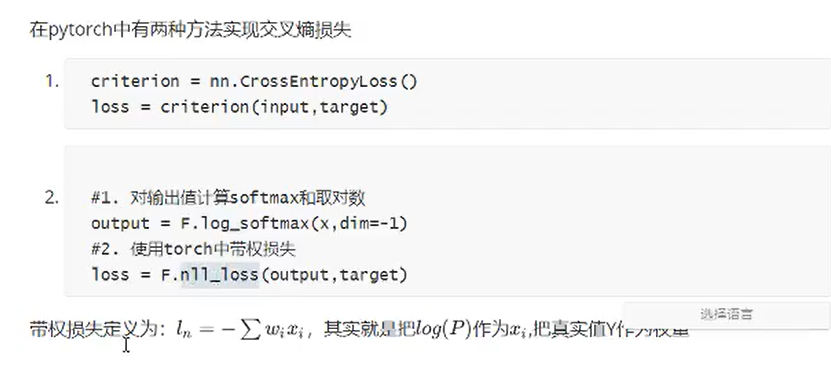

In [4]:
from torchvision.datasets import MNIST
import torchvision
from torchvision.transforms import Compose,ToTensor,Normalize
import torch.nn.functional as F   #激活函数F.relu(x)
import torch.nn as nn 
import torch
batch_size =128

#准备数据集
def get_dataloader(train=True):
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()
                                              ,torchvision.transforms.Normalize((0.3107),(0.3081))])
    dataset = torchvision.datasets.MNIST(root=r'C:\Users\刘东楷\mnist', #此处为自己定义的下载存在目录
                                     train=True,#返回训练集
                                     download=False,
                                     transform=transform)#自定义转换方式
    data_loader = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)
    return data_loader
#准备模型  
class Mnisnet(nn.Module):
    def __init__(self):
        super(Mnisnet,self).__init__()
        self.fc1 = nn.Linear(1*28*28,28)
        self.fc2 = nn.Linear(28,10)
    def forward(self,x):
        x = x.view(x.size(0),28*28*1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x)
        
# criterion = nn.CrossEntropyLoss() 替代F.log_softmax(x)，F.nll_loss(predict,target)
model=Mnisnet()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
train_data = get_dataloader()
for j in range(5):
    for i,(inputs,target) in enumerate(train_data):
        optimizer.zero_grad()
        predict = model(inputs)
        loss = F.nll_loss(predict,target)

        loss.backward()
        optimizer.step()
        if i%100 == 0:
            print(loss.item())
torch.save(model.state_dict(),"model_tuxiangshuzi.pt")

D:\cn\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


2.296238660812378
0.5801610946655273
0.41640394926071167
0.4137573838233948
0.3892837166786194
0.1336878389120102
0.38953232765197754
0.27132099866867065
0.23784461617469788
0.13333697617053986
0.4569728672504425
0.44349801540374756
0.1953732818365097
0.15611708164215088
0.23461602628231049
0.25249773263931274
0.14086955785751343
0.24091836810112
0.2378435581922531
0.16270364820957184
0.18697534501552582
0.24971182644367218
0.10059348493814468
0.14951063692569733
0.22541989386081696
0.26320716738700867
0.15148314833641052
0.307039350271225
0.05778828263282776
0.35109785199165344
0.17567837238311768
0.25732123851776123
0.3204934298992157
0.06262261420488358
0.34579774737358093
0.26047393679618835
0.3511825203895569
0.1334514021873474
0.16210556030273438
0.23591187596321106
0.0686967596411705
0.10305965691804886
0.1281299889087677
0.1334080994129181
0.16466927528381348
0.16251716017723083
0.062138065695762634
0.15051738917827606
0.20531408488750458
0.2077132612466812


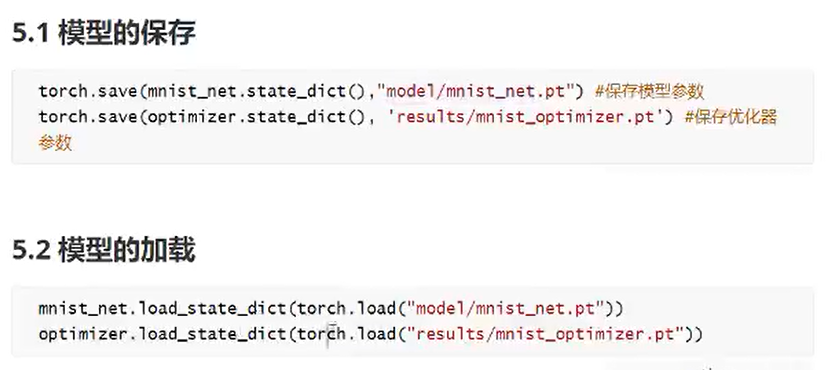

### 模型的测试

In [23]:
import torch
model.load_state_dict(torch.load("model_tuxiangshuzi.pt"))
test_data =get_dataloader(train=False)
def test():
    prediction=[]
    targetion=[]
    for i,(inputss,target) in enumerate(test_data):
        targetion.append(target)
        predict = model(inputss)
        prediction.append(predict)
    return prediction,targetion

In [24]:
k,t=test()

D:\cn\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [25]:
k[0].data.max(1)[1]

tensor([0, 1, 7, 7, 6, 2, 7, 0, 7, 9, 9, 4, 4, 4, 2, 4, 1, 4, 9, 4, 4, 9, 9, 0,
        8, 3, 9, 9, 2, 0, 0, 7, 2, 5, 1, 3, 3, 9, 4, 6, 0, 3, 5, 4, 1, 6, 5, 4,
        8, 1, 9, 7, 4, 8, 7, 7, 7, 2, 5, 4, 5, 7, 0, 6])

In [26]:
t[0]

tensor([0, 1, 7, 7, 6, 2, 7, 0, 7, 9, 9, 4, 4, 4, 2, 4, 1, 4, 9, 4, 4, 9, 4, 0,
        8, 3, 9, 9, 2, 0, 0, 7, 2, 5, 1, 3, 3, 9, 4, 6, 0, 3, 5, 4, 1, 6, 5, 4,
        3, 1, 9, 7, 4, 8, 7, 7, 7, 2, 5, 4, 5, 7, 0, 6])